### Datos propios:

    ➤ Nombre: Gerardo Morsucci
    ➤ Edad: 20 años
    ➤ Viviendo en: Mendoza - Argentina
    

# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

 Los datos que me ayudarían a trabajar en el problema son los siguientes:
 
     ➤ El tamaño total de la propiedad en metros cuadrados.
     
         Nos ayuda a saber de cuanto espacio total disponemos en cuanto a limites de la propiedad
     
     ➤ El tamaño total bajo techo de la propiedad en metros cuadrados.
     
         Ayuda a entender que espacio de la propiedad mantiene una construcción, y haciendo una simple suma, saber cuanto
         queda libre
     
     ➤ Antigûedad de la construcción.
     
         Nos ayudará para tener un índice de en qué estado se encuentra la construcción
     
     ➤ Su total de habitaciones.
     
         Mientras mas divisiones tiene, puede ir variando su precio.
     
     ➤ Su localidad.
     
         Hay localidades mas costosas que otras.
 Se podria trabajar aparte, datos que nos hagan saber que tanto dinero en muebles tiene cada propiedad.

# 2. Análisis Exploratorio de Datos


## **Importo las librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### **Importo el dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/A/DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
print("El dataset tiene {} datos y {} columnas".format(df.shape[0], df.shape[1]))

**Descripciones básicas de cada variable numérica del dataset**

In [ ]:
display(df.describe())

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


**Impresión de los primeros 5 datos**

In [ ]:
display(df.head())

### **¿Cuáles son las variables?**

### _Variables numericas y categoricas_

In [ ]:
display(df.dtypes.value_counts())

In [ ]:
num_vars = df.columns[df.dtypes != "object"]
cat_vars = df.columns[df.dtypes == "object"]
print(num_vars)
print(cat_vars)

### **Cantidad de missing values**

In [ ]:
df[num_vars].isnull().sum().sort_values(ascending=False)

surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
rooms                  0
bedrooms               0
price                  0
dtype: int64

In [ ]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

surface_covered    0.147375
surface_total      0.139963
lon                0.067905
lat                0.067674
bathrooms          0.040618
rooms              0.000000
bedrooms           0.000000
price              0.000000
dtype: float64

**Porcentaje de missing values**

Nos encontramos con que surface_covered tiene casi un 15% de missing values y surface_total tiene un 14%.

### **Explorando los tipos de propiedad**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

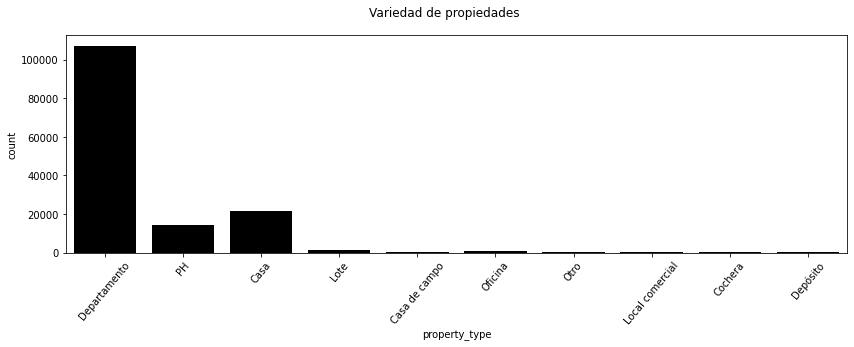

In [ ]:
# property_type
plt.figure(figsize=(14,4))
plt.suptitle("Variedad de propiedades")
sns.countplot(x="property_type", data=df, color="black")
plt.xticks(rotation=50)

**Como se puede observar en el histograma, hay un total de 10 tipos de propiedades**
**Departamentos, el que mas datos tiene sube por encima de los 13000, siguiendole casa con un poco mas de 21000 datos. Por último tenemos PH que no  alcanza a llegar a los 20000, tiene alrededor de 16000 datos.**

Mientras tanto los otros tipos de propiedades, cuentan con una cantidad de datos no tan significante que va en descenso desde los 3000 datos.

## *Paso a contar las cantidad de propiedades en cada region de Buenos Aires y en cada barrio*

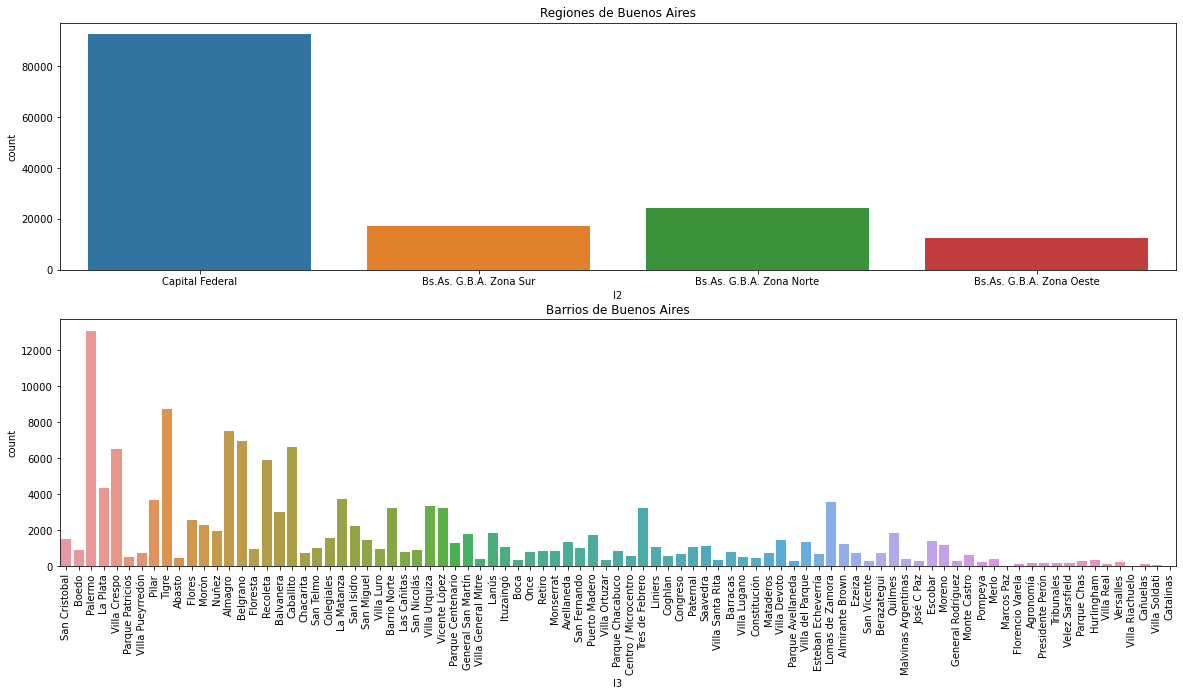

In [ ]:
fig, ax =plt.subplots(2,1,figsize=(20,10))
ax1 = sns.countplot(x='l2',data=df, ax=ax[0])
ax2 = sns.countplot(x='l3',data=df, ax=ax[1])
ax1.title.set_text('Regiones de Buenos Aires')
ax2.title.set_text('Barrios de Buenos Aires')
plt.xticks(rotation=90)
plt.rcParams["font.size"]=13.8

**En el primer countplot podemos observar que "Capital Federal" es  el que se encuentra con la mayor cantidad de datos (mayor a 90000),  seguido por zona oeste del gran Buenos Aires(mas de 20000).
Introduciendo nuestro ojo dentro de Capital Federal observamos que cuenta con 89 distintas localidades, las tres que mas datos contienen son La Plata(más de 12000), Tigre(mas de 8000) y Almagro(más de 7000).**

## *Filtrado del dataset.*

**Vamos a filtrar por los 3 tipos de inmuebles que contienen la mayor cantidad de datos, dentro de Capital Federal**

In [ ]:
newdf = df.loc[(df["l2"].isin(["Capital Federal"])) &
               (df["property_type"].isin(["Departamento","PH","Casa"]))]
newdf.shape
# CHECKPOINT!

(91485, 19)

## Visualización de outliers y su respectiva eliminación

**Hemos decidido utilizar boxplots para visualizar correctamente los valores que toman los outliers**

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Metros cuadrados')

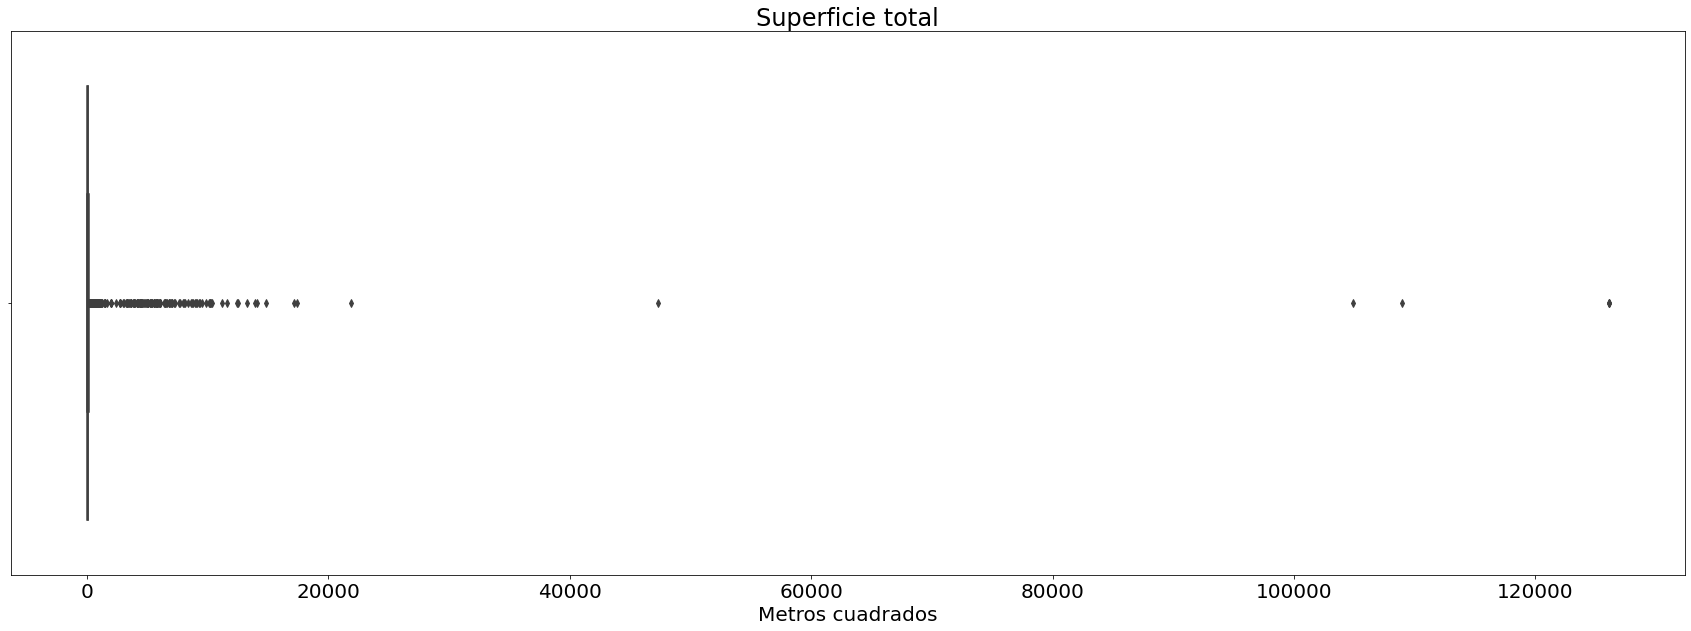

In [ ]:
# Los siguientes graficos son boxplots, para ver las variaciones de tamaño de los outliers y asi eliminarlos
# Boxplot de surface_total
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b = sns.boxplot(newdf.surface_total)
b.set_title('Superficie total')
b.set_xlabel('Metros cuadrados')

**Se ha hecho la observación que hay datos excesivamente grandes para lo que seria la superficie total de un inmueble, si bien pueden ser verdaderos, nos traería un gran sesgo al proyecto dado que a un espacio tan grande es dificil calcularle el precio. Serán considerados valores hasta 2000m2**

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Metros cuadrados')

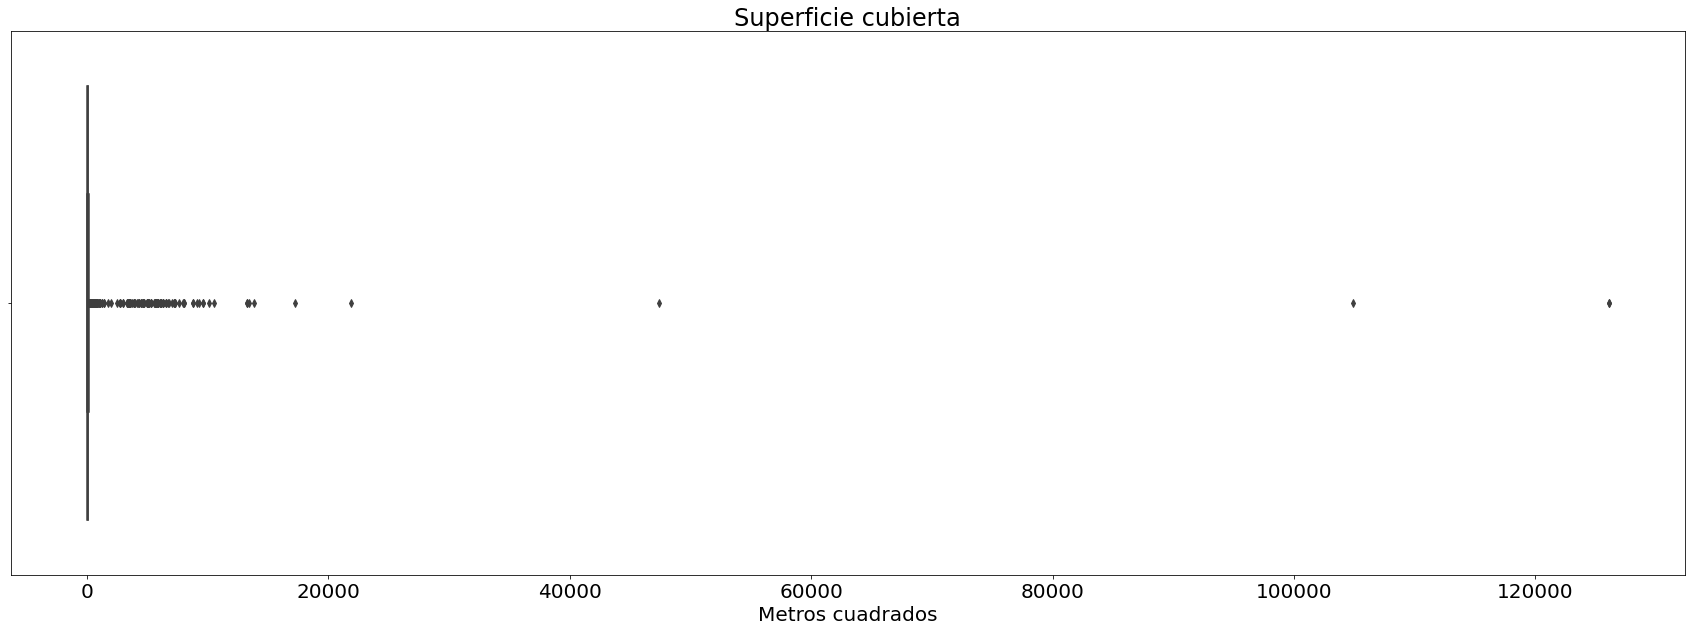

In [ ]:
# Boxplot de surface_covered
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b1 = sns.boxplot(newdf.surface_covered)
b1.set_title('Superficie cubierta')
b1.set_xlabel('Metros cuadrados')

**Aquí se observa poco mas de lo mismo, se toman valores excesivamente grandes, los cuales pueden producir sesgos facilmente, se tomarán en consideracion datos hasta 1000m2**

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de habitaciones')

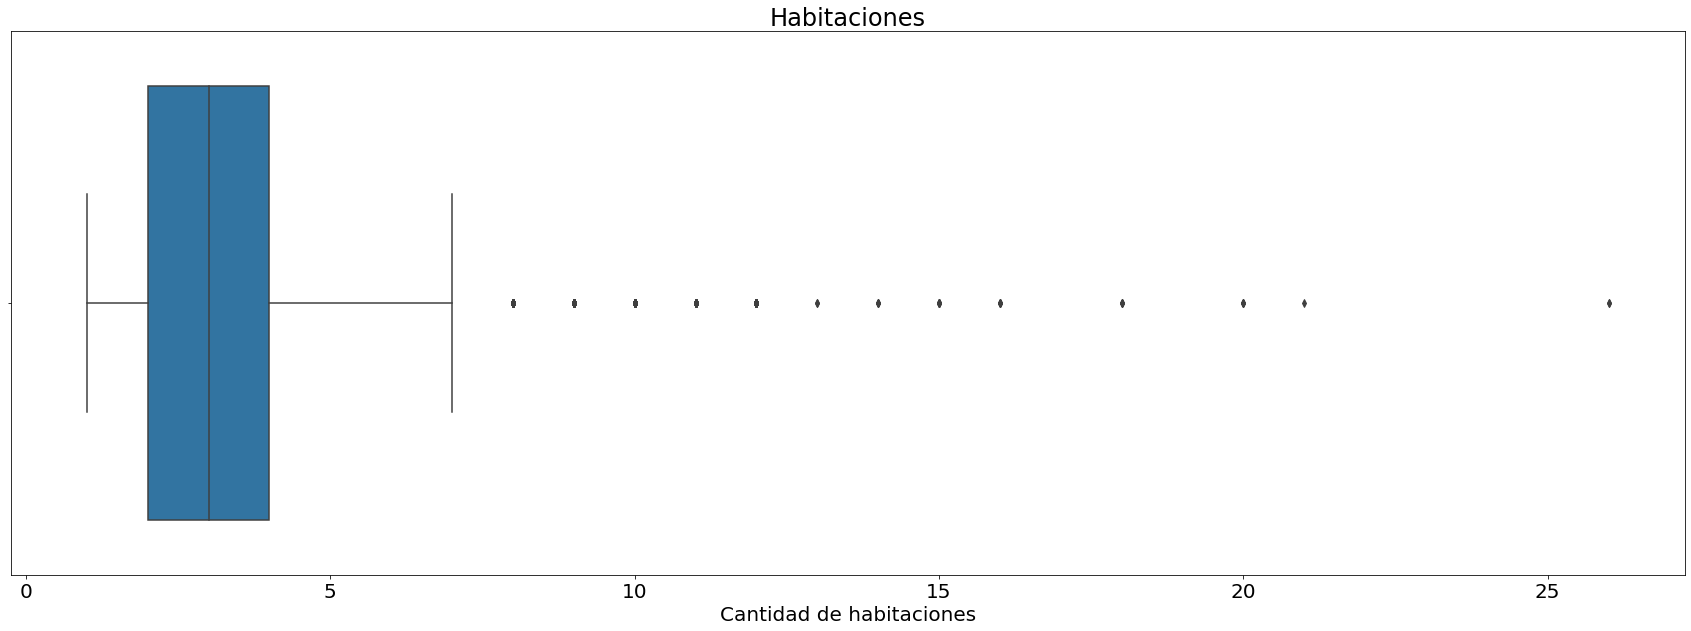

In [ ]:
# Boxplot de rooms
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b2 = sns.boxplot(newdf.rooms)
b2.set_title('Habitaciones')
b2.set_xlabel('Cantidad de habitaciones')

**Se visualizan mucha cantidad de habitaciones para la relacion con el tamaño de propiedades, hay datos excesivos, no muchos, pero si se requiere de un filtrado(Hasta 20 habitaciones el filtrado)**

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de dormitorios')

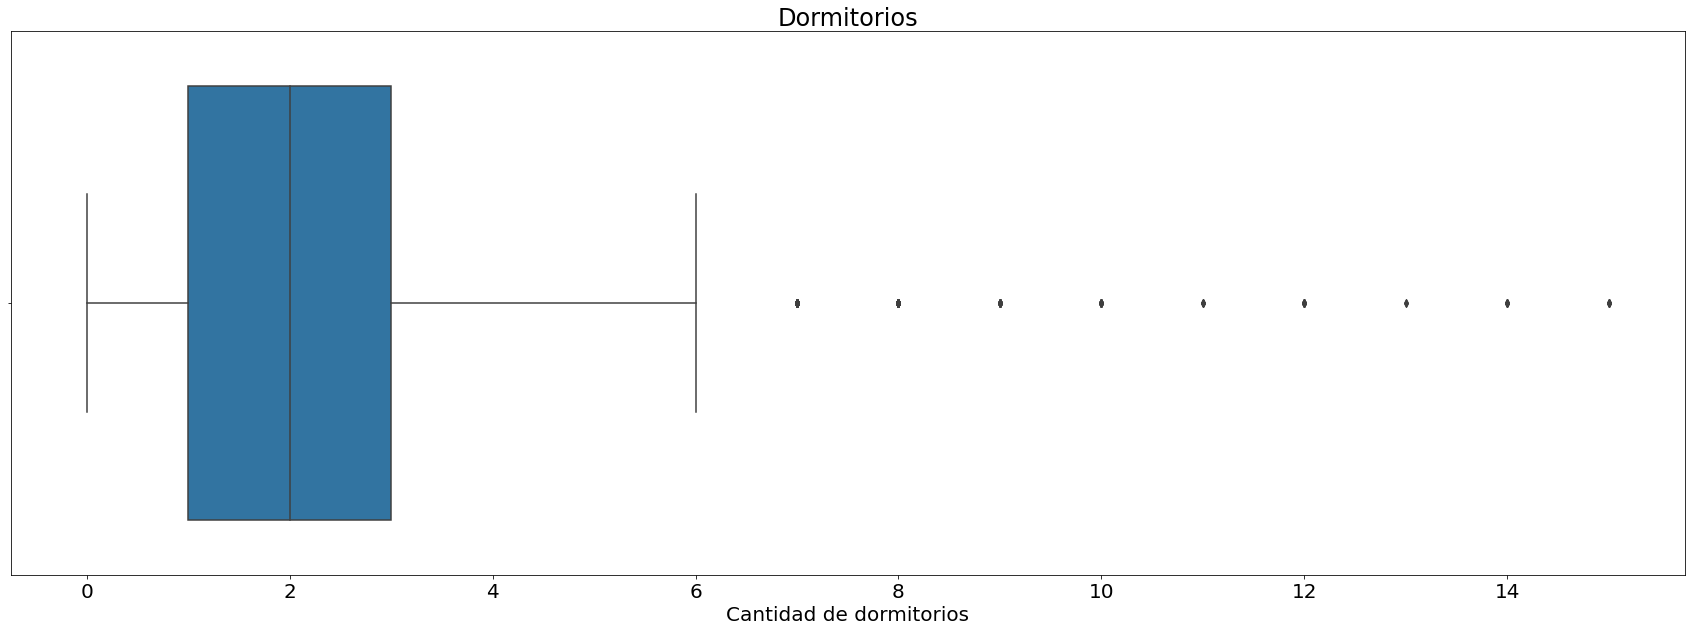

In [ ]:
# Boxplot de bedrooms
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b3 = sns.boxplot(newdf.bedrooms)
b3.set_title('Dormitorios')
b3.set_xlabel('Cantidad de dormitorios')

**Como se observo en el boxplot anterior, para mantener una relación proporción se permitira con un filtrado valores hasta 10 dormitorios. Facilmente se observa que los valores llegan hasta 14 dormitorios, lo cual no tiene sentido según la lógica para prevenir sesgos que venimos tomando.**

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de baños')

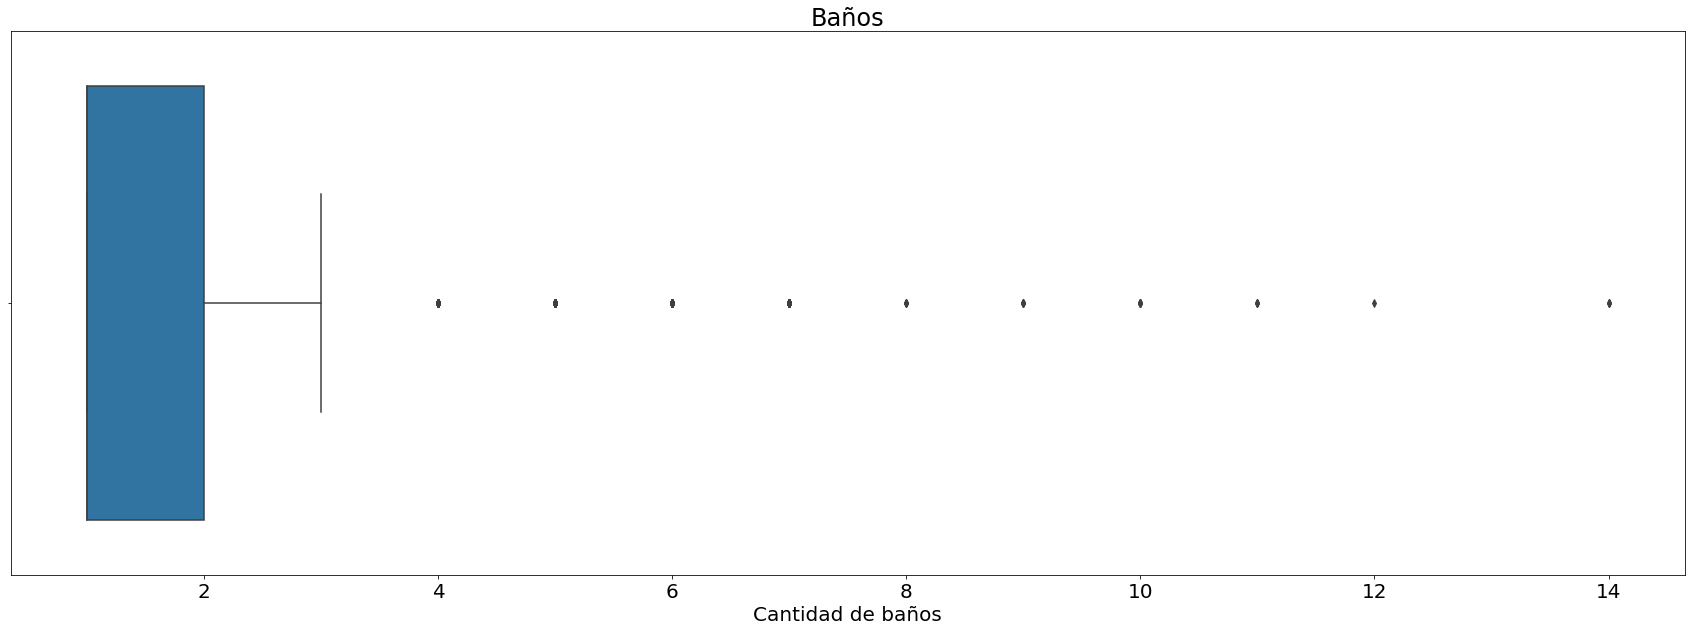

In [ ]:
# Boxplot de bathrooms
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b4 = sns.boxplot(newdf.bathrooms)
b4.set_title('Baños')
b4.set_xlabel('Cantidad de baños')

**Ocurre lo mismo que con los dormitorios, el filtrado que se realizara sera hasta 6 baños lo permitido, se llegan a tomar según muestra el gráfico valores de hasta 14, lo que llama mucho la atención.**

## Primer filtrado grande de outliers en el dataset.

In [ ]:
newdf1 = newdf[(newdf["surface_covered"] > 15) & (newdf["surface_covered"] < 1000)]
newdf2 = newdf1[(newdf1["rooms"] > 0) & (newdf1["rooms"] < 20)]
newdf3 = newdf2[(newdf2["bedrooms"] > 0) & (newdf2["bedrooms"] < 10)]
newdf4 = newdf3[(newdf3["bathrooms"] > 0) & (newdf3["bathrooms"] < 6)]
newdf5 = newdf4[(newdf4["surface_total"] > 0) & (newdf4["surface_total"] < 2000)]
newdf6 = newdf5[newdf5["surface_total"] > newdf5["surface_covered"]]
newdf6.shape

(55578, 19)

 ### A visualizar el boxplot de precio!

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '$$$')

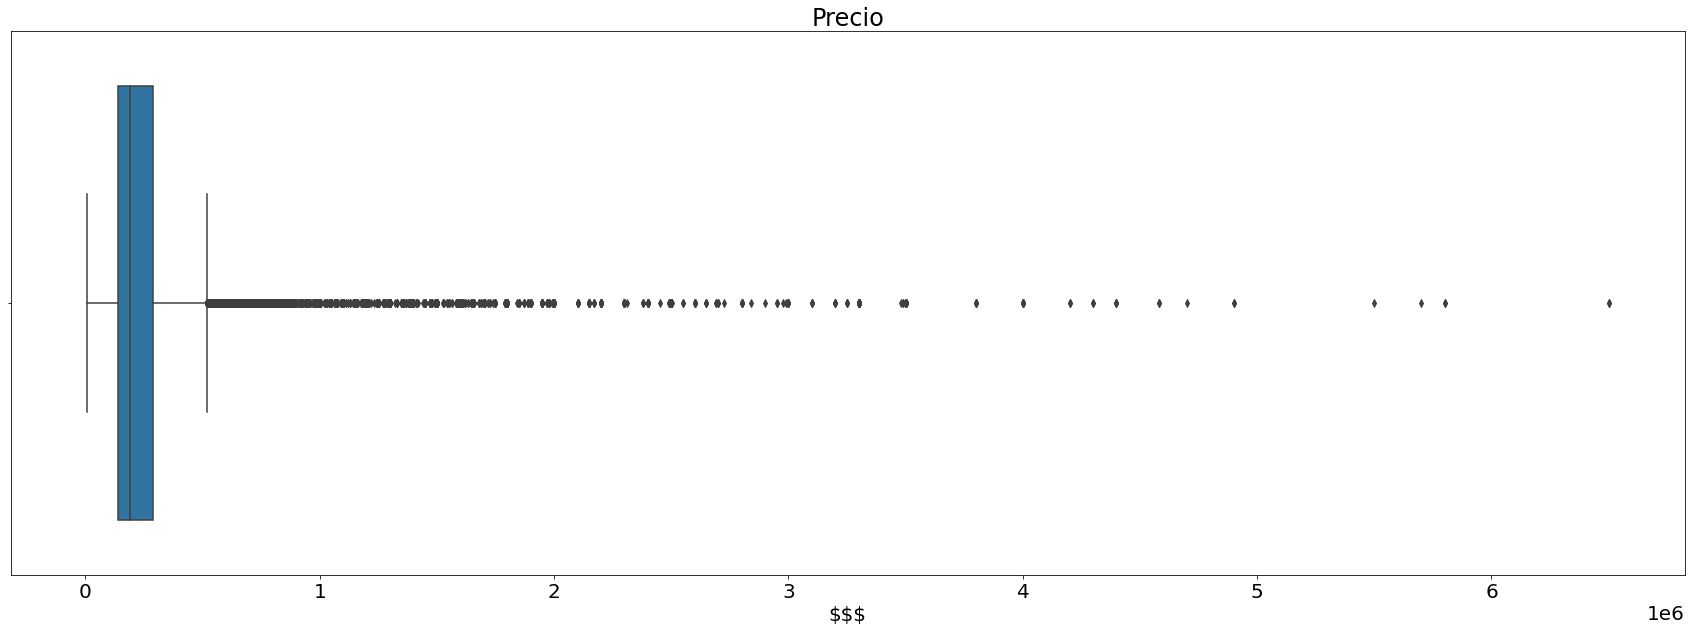

In [ ]:
# Boxplot de precio
plt.figure(figsize=(30,10))
plt.rcParams["font.size"]=20
b5 = sns.boxplot(newdf6.price)
b5.set_title('Precio')
b5.set_xlabel('$$$')

**Después de bastantes filtrados nos encontramos con que se llegan a tomar valores de hasta casi 700.000u$s.**
Esto nos da pie para realizar un filtrado acorde a la información que tenemos, comparando cantidad de dormitorios, habitaciones y el tamaño de las propiedades en general, los datos tienen variaciones grandes para los mismos tipos de propiedades, es decir, hay precios excesivos, los cuales nos pueden generar un mal aprendizaje del modelo de predicción.

In [ ]:
# Segundo filtrado de outliers ( Solo incluye el filtrado de price )
newdf7 = newdf6[(newdf6["price"] > 20000) & (newdf6["price"] < 1000000)]
newdf7.shape

(54415, 19)

### Revisamos la cantidad de outliers que quedan

In [ ]:
# variables numericas y categoricas
num_vars = newdf7.columns[df.dtypes != "object"]
cat_vars = newdf7.columns[df.dtypes == "object"]
print(num_vars)
print(cat_vars)
# cantidad de missing values
newdf7[num_vars].isnull().sum().sort_values(ascending=False)

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price'],
      dtype='object')
Index(['start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


lat                2661
lon                2661
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
dtype: int64

# Heatmap de correlaciones, con el dataset sin filtrar outliers

Text(0.5, 1.0, 'Correlaciones con outliers')

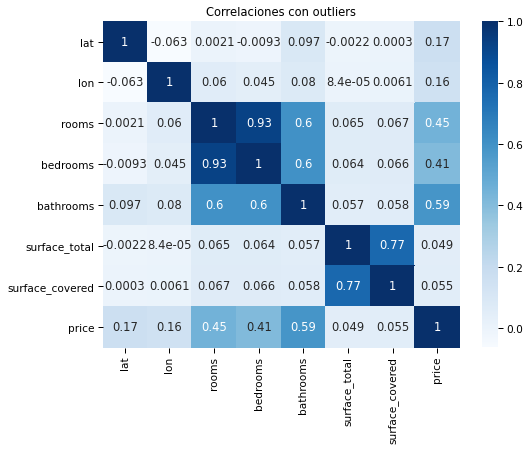

In [ ]:
# Heatmap de correlaciones, con el dataset sin filtrar outliers
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.2)
dfnew_corr = newdf.corr()
h1 = sns.heatmap(dfnew_corr, annot=True, cmap="Blues")
h1.set_title("Correlaciones con outliers")

En este gráfico se representa la importancia de eliminar los outliers, ¿por qué?
Simplemente con observar que la variable price tiene una correlacion de 0.055 con superficie cubierta, y 0.049 con superficie total, nos damos cuenta que si contamos con esos outliers el modelo de predicción nunca va a tener éxito.
Dentro de lo que es rooms, vemos una correlación de 0.45 lo cual no esta mal pero, se puede mejorar mucho.

# Heatmap con el dataset filtrado
### ¿Cuáles son las mejores variables para predecir el precio?
**surface_covered, surface_total, rooms, bedrooms, brathrooms**

Text(0.5, 1.0, 'Correlaciones sin outliers')

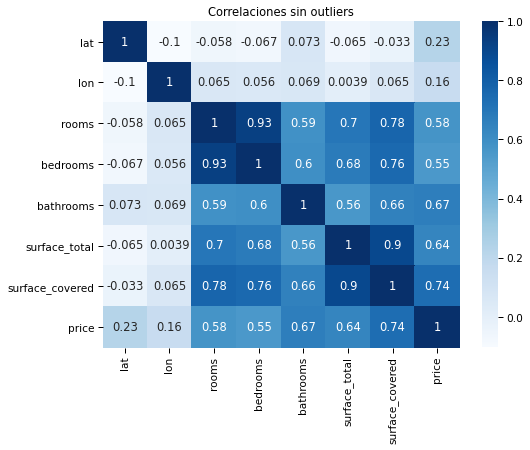

In [ ]:
# Heatmap con el dataset filtrado
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.2)
dfnew7_corr = newdf7.corr()
h2 = sns.heatmap(dfnew7_corr, annot=True, cmap="Blues")
h2.set_title("Correlaciones sin outliers")
# ¿Cuáles son las mejores variables para predecir el precio?
# surface_covered, surface_total, rooms, bedrooms, brathrooms

**Aquí aplicamos los filtros y eliminaciones de outliers, cambia mucho, vemos que price ahora tiene una relacion alta con surface covered y surface total, la cual va entre 0.64 y 0.74, aumentando poco mas de 100% su correlación.
Por otro lado la variable rooms mejoro mucho en relacion a price, ahora tiene unos puntos mas que antes (0.13)
bedroom subió 0.14 puntos en respecto a price.
bathroom subió 0.08 puntos, dandole un total de 0.67, con respecto a price.**

# 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

# ¿ Cuanto vale el metro cuadrado en cada inmueble ?


**¿Cuáles son los sesgos de la respuesta obtenida?**

    Que no se sabe que tienen las propiedades en sus alrededores que las hacen tomar su precio caracteristico, no se sabe su estado tampoco.
    
  ¿Necesitas información complementaria?
 
    No la necesito, porque se puede obtener el precio del metro cuadrado o es mejor decir, responder la pregunta hecha, pero
    para imaginarnos verdaderamente cada propiedad, según los datos que nos arrojan los graficos, me falta información para
    justificar los precios excesivamente altos y excesivamente bajos

In [ ]:
# Creación de la variable "m2_price" que contiene el valor por m2 de cada propiedad.
newdf7[['surface_total', 'price']] = newdf7[['surface_total', 'price']].astype(float)
newdf7['m2_price'] = newdf7['price']/newdf7['surface_total']
newdf7['m2_price']

C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-25-0a38735e235c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf7['m2_price'] = newdf7['price']/newdf7['surface_total']


1         2271.428571
3         3470.588235
8         1977.777778
9         1977.777778
10        2575.757576
             ...     
146552    3389.937107
146553    5849.056604
146554    3257.142857
146555    3333.333333
146556    1671.924290
Name: m2_price, Length: 54415, dtype: float64

### PRECIO DEL METRO CUADRADO EN LOCALIDADES CAPITAL FEDERAL

(array([0]), [Text(0, 0, 'Capital Federal')])

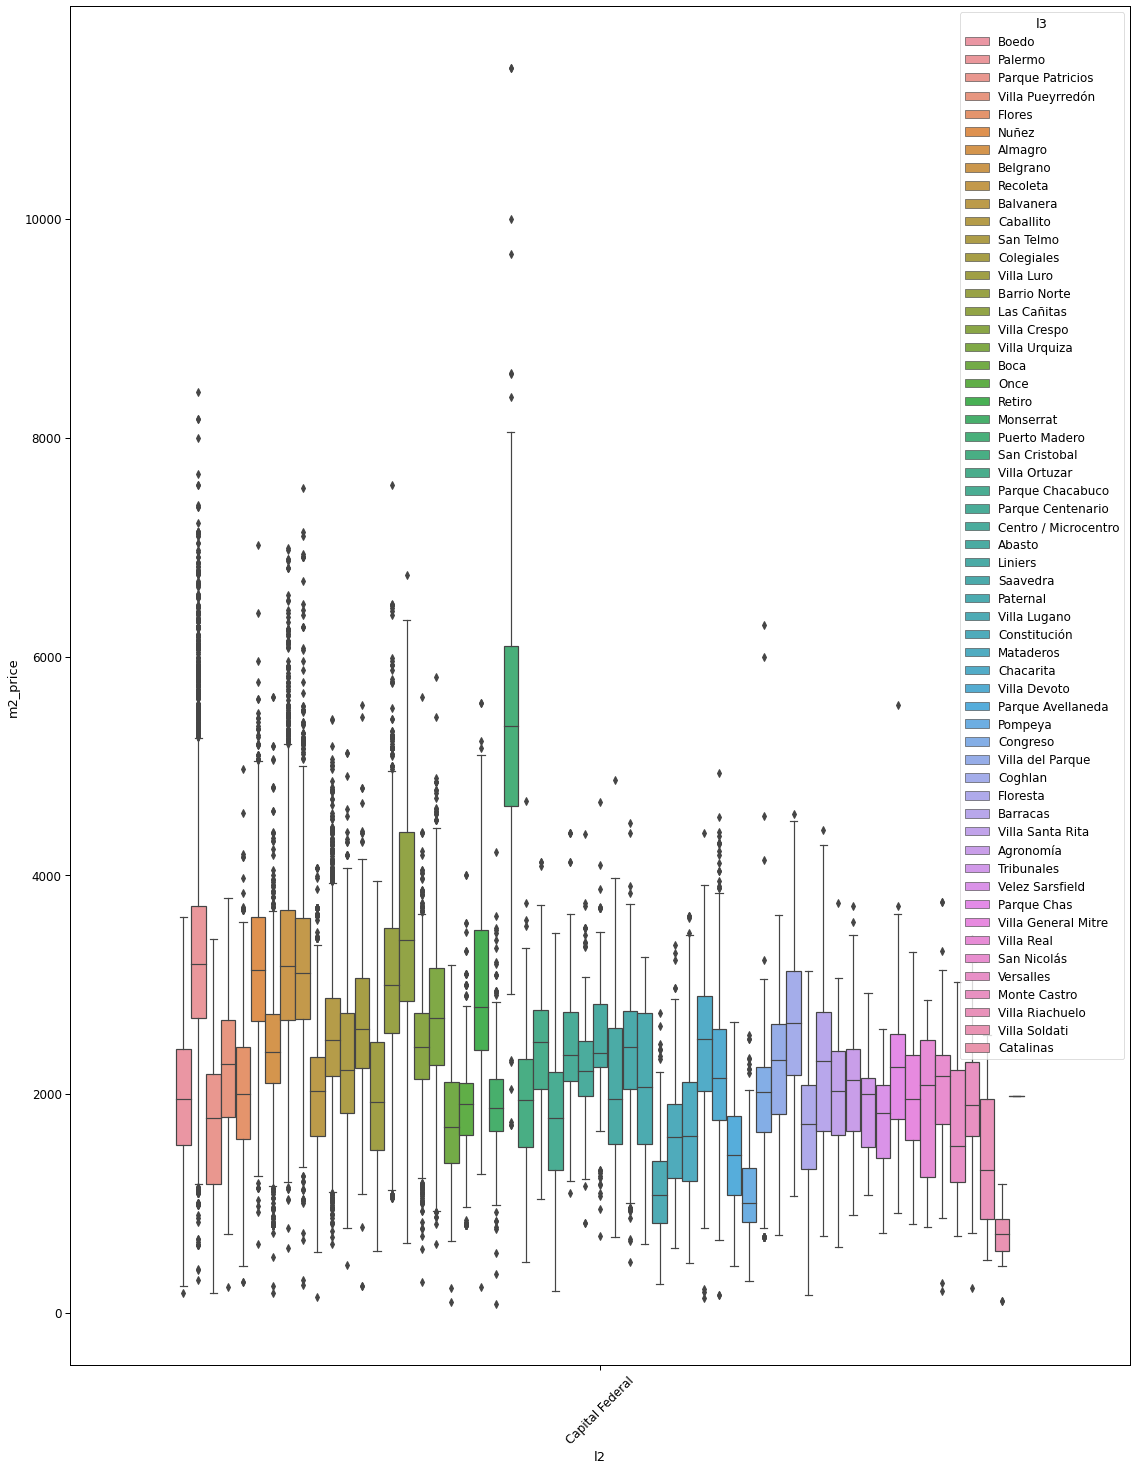

In [ ]:
plt.rcParams["font.size"]=15
sns.set_context("paper", font_scale=1.35)
plt.figure(figsize=(19,25))
sns.boxplot(x="l2", y="m2_price", data=newdf7, hue="l3")
plt.xticks(rotation=45)

Aquí podemos observar un boxplot, que nos facilita la vista hacia todos los barrios de Capital Federal, cada localidad dentro de su box contiene con una marca horizontal su media, tomando un ejemplo, la media de Boedo esta llegando a los 2000usd y la media de Palermo poco mas de los 3000usd el m2. El metro cuadrado mas caro es el de puerto madero, con un valor de poco mas de 5000usd la media, detrás de esta respuesta hay información que no figura que es necesaria saber, Puerto Madero es el barrio mas caro de America Latina, cito nota de infobae.

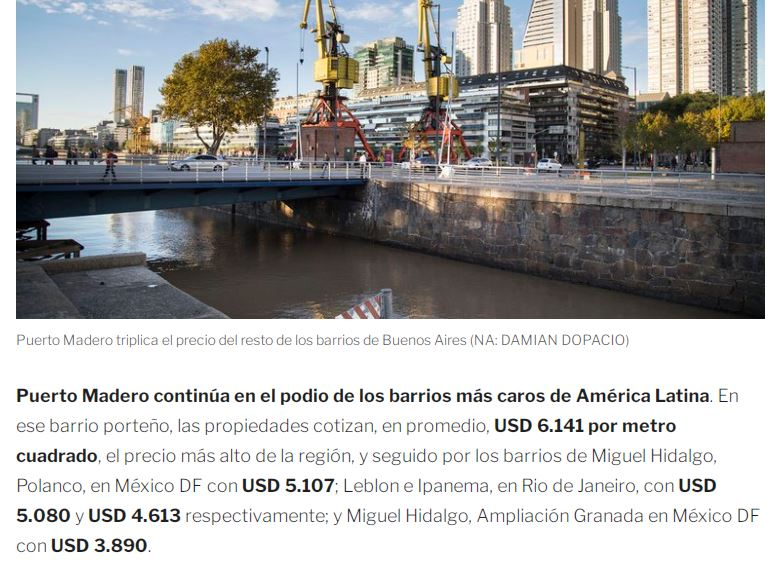![infobae.JPG](attachment:infobae.JPG)

La localidad mas barata de Capital Federal, según nuestro boxplot, es Catalinas. Algo que llama mucho la atención, es que Catalinas, es un complejo de torres que se extiende muy pocos metros a la cuadrada, lo que me hace pensar que puede tener muy pocos datos, como para formar un número significativo que nos haga ver realmente que es la localidad mas barata.

### VARIACIONES DE PRECIO SEGUN TIPO DE INMUEBLE EN CADA LOCALIDAD ( MUCHA FALTA DE DATOS )

<AxesSubplot:xlabel='property_type', ylabel='l3'>

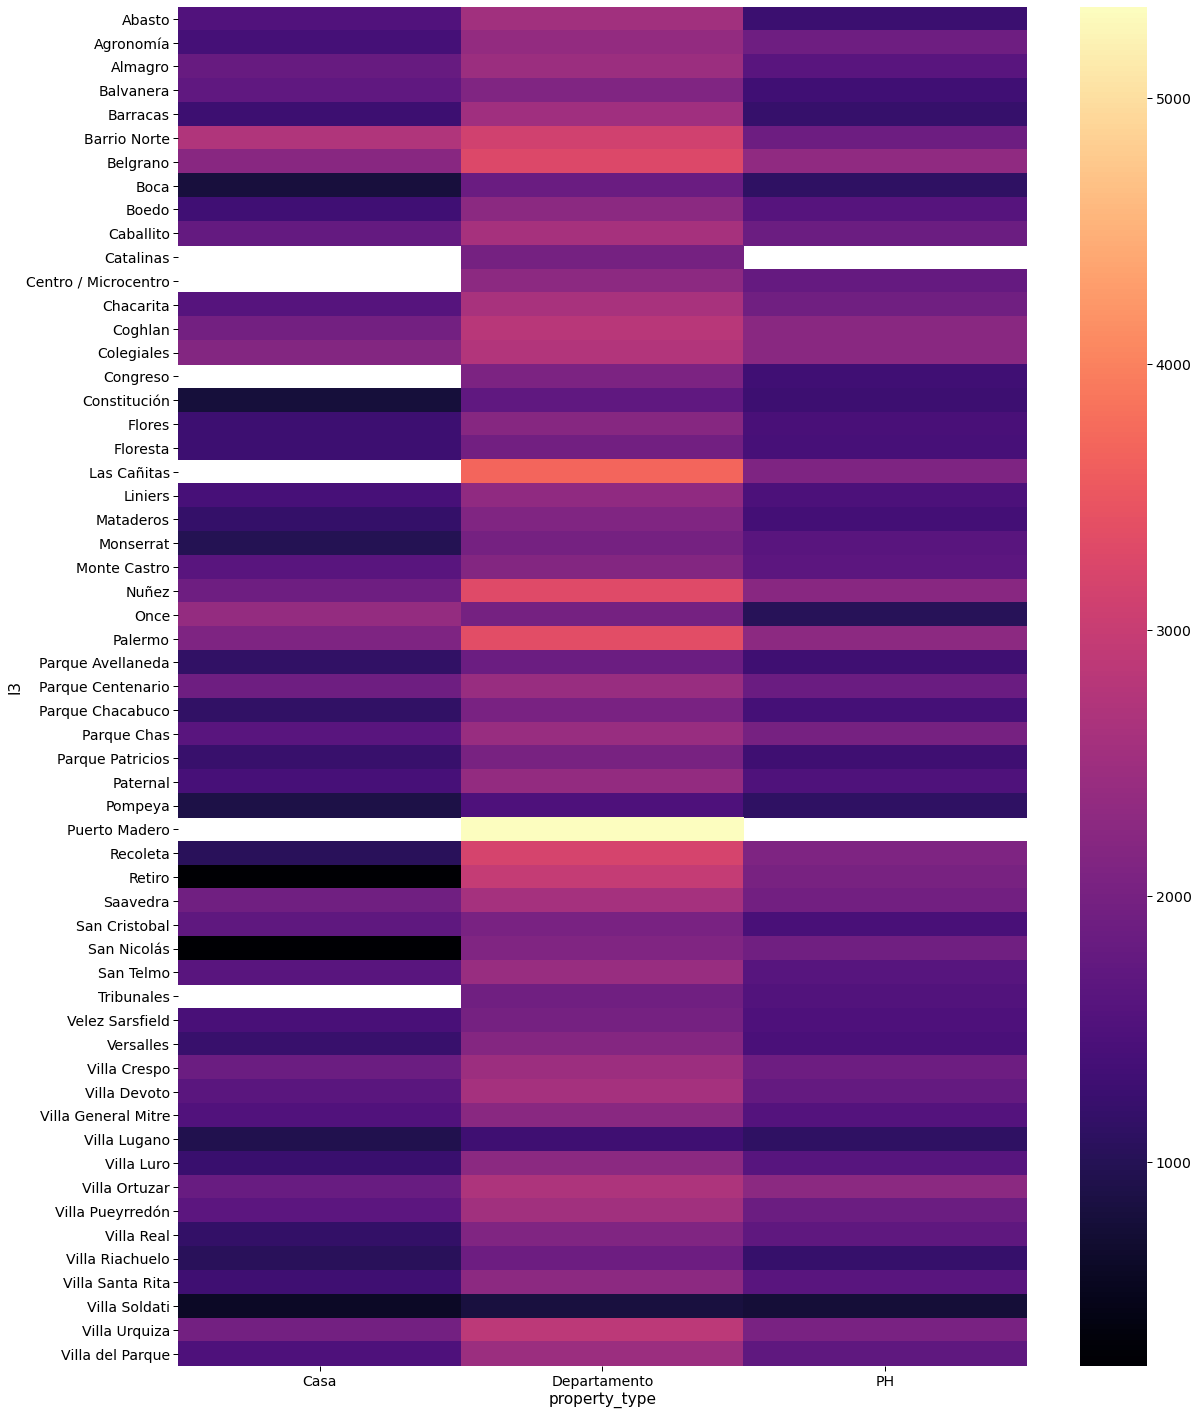

In [ ]:
capa2 = newdf7.pivot_table(index="l3", columns="property_type", values="m2_price")
sns.set_context("paper", font_scale=1.6)
plt.figure(figsize=(19,25))
sns.heatmap(capa2, cmap="magma", linecolor="white")

En este gráfico podemos concluir que los departamentos se imponen en precio por m2 sobre las casas y ph's, salvo en Once donde las casas estan unos puntos más arriba en precio.

Es bueno tener en cuenta que el precio en el gráfico representa a su respectiva media en cada localidad.
Se observa gracias al colormap elegido, una falta de datos en casas y ph's para Puerto Madero, también falta de datos de casas en Tribunales, Las Cañitas, Congreso y microcentro.

Las Catalinas tampoco tiene casas ni ph's, esto es debido a que es un complejo de torres que se extiende unos pocos metros.

# 3. Machine Learning
**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
    df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
    dfn = pd.DataFrame (df[df.property_type.isin(["Departamento", "PH", "Casa"])
                      & (df.l2 == "Capital Federal")])
    dfn = dfn[(dfn.surface_total <= 1000) & (dfn.surface_total >= 15)]
    dfn = dfn[(df.price <= 4000000)]
    dfn = dfn[["rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms", "price"]]
    dfn = dfn.dropna()
    dfn.shape
    # CHECKPOINT!

<ipython-input-4-3f7882a49455>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfn = dfn[(df.price <= 4000000)]


(81019, 6)

### Defino X e Y

In [ ]:
X = dfn.iloc[:, 0:5].values
y = dfn.iloc[:, 5:6].values

### Defino las variables X_train, y_train, X_test e y_test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 4)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 3)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.33, random_state = 5)

### Importo los modelos y métricas que voy a utilizar.
**El modelo benchmark será una regresión lineal, por otro lado haré un modelo de arboles de decisión y otro de knn.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

### Creo las variables que contendran los modelos y optimizo sus hiperparámetros.

In [ ]:
lineal_regression = LinearRegression()
regression = DecisionTreeRegressor(max_depth=12, min_samples_split=2, min_samples_leaf=2, random_state=3)
knn_regressor = KNeighborsRegressor(n_neighbors=4)

### Fiteo mi modelo benchmark.

**La busqueda para mejorar la práctica de nuestro modelo, dio resultado en fitear un modelo de benchmark de regresión lineal simple, para así, obtener luego comparativas entre gráficos reales contra gráficos de valores predichos.**

In [ ]:
lineal_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Raíz del error cuadrático medio en Train, para el modelo de Benchmark: 174198.24961426784
Raíz del error cuadrático medio en Test, para el modelo de Benchmark: 182235.6243043009
Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark:  0.6405725778492393
Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark: 0.6518352744706363


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


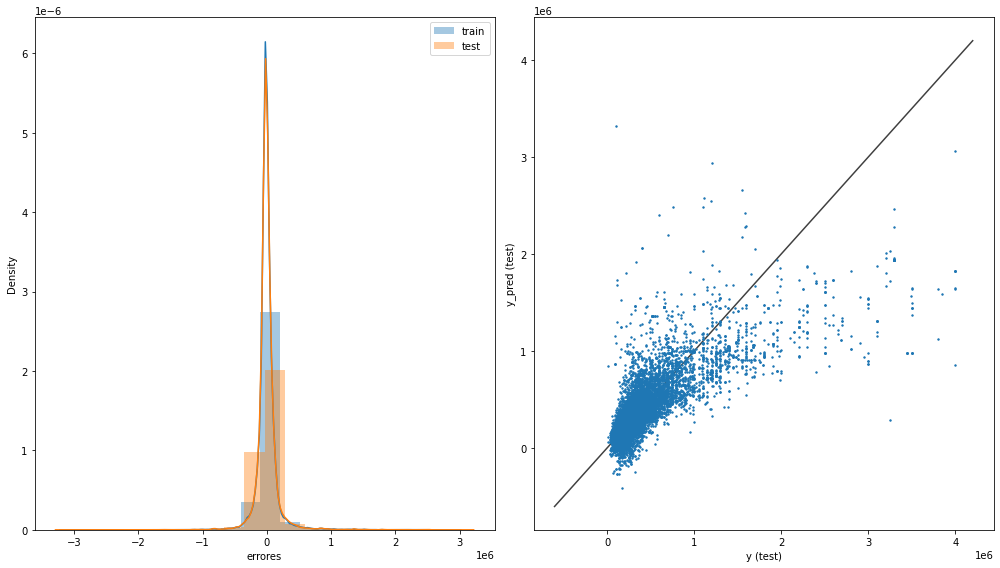

In [ ]:
y_train_pred = lineal_regression.predict(X_train)
y_test_pred = lineal_regression.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train, para el modelo de Benchmark: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test, para el modelo de Benchmark: {rmse_test}')
r_square = metrics.r2_score(y_test, y_test_pred)
print('Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark: ', r_square)
r_square = metrics.r2_score(y_train, y_train_pred)
print('Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark:', r_square)
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

###  Modelos de machine learning

Arbol de decisión:

In [ ]:
regression.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=2, random_state=3)

Raíz del error cuadrático medio en Train: 105550.79064920695
Raíz del error cuadrático medio en Test: 144110.17870895038
Error de R cuadrado en test, asociado con el regression tree:  0.7517804913398227
Error de R cuadrado en train, asociado con el regresion tree:  0.8786547912781998


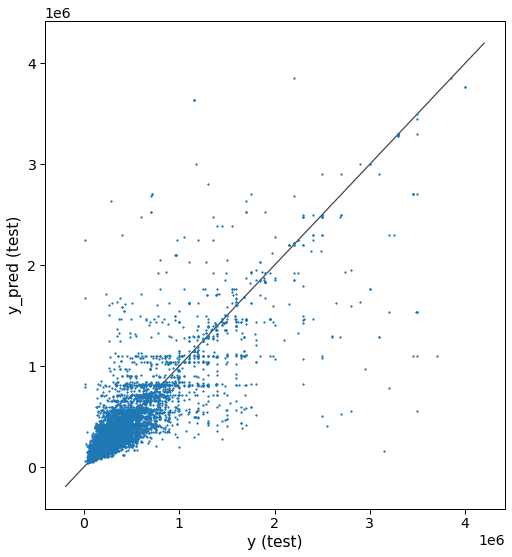

In [ ]:
y_train_pred1 = regression.predict(X_train1)
y_test_pred1 = regression.predict(X_test1)
rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train1}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test1}')
r_square1 = metrics.r2_score(y_test1, y_test_pred1)
print('Error de R cuadrado en test, asociado con el regression tree: ', r_square1)
r_square1 = metrics.r2_score(y_train1, y_train_pred1)
print('Error de R cuadrado en train, asociado con el regresion tree: ', r_square1)

plt.figure(figsize = (14,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test1,y_test_pred1, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

K- Nearest Neighbors

In [ ]:
knn_regressor.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
from sklearn.metrics import accuracy_score

Raíz del error cuadrático medio en Train: 116259.40700118591
Raíz del error cuadrático medio en Test: 152739.7108338257
Error de R cuadrado en test, asociado con el knn regressor:  0.7329492390086925
Error de R cuadrado en train, asociado con el knn regressor:  0.8504178515128668


C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TETE\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


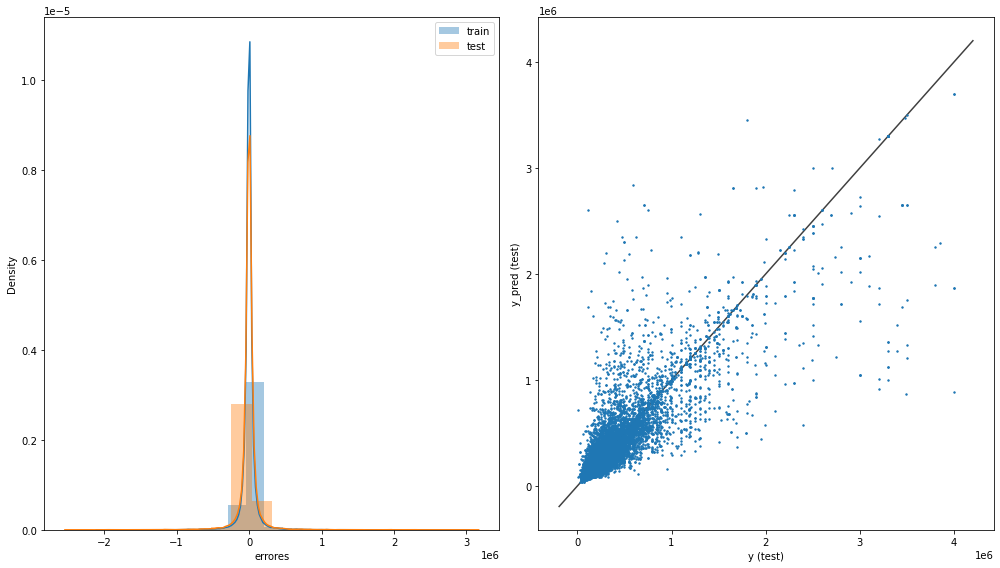

In [ ]:
y_train_pred2 = knn_regressor.predict(X_train2)
y_test_pred2 = knn_regressor.predict(X_test2)
rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test2}')
r_square2 = metrics.r2_score(y_test2, y_test_pred2)
print('Error de R cuadrado en test, asociado con el knn regressor: ', r_square2)
r_square2 = metrics.r2_score(y_train2, y_train_pred2)
print('Error de R cuadrado en train, asociado con el knn regressor: ', r_square2)
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
sns.distplot(y_train2 - y_train_pred2, bins = 20, label = 'train')
sns.distplot(y_test2 - y_test_pred2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test2,y_test_pred2, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()



Elegí usar la métrica de R-Square por qué, esta métrica en conjunto con  un buen modelado de benchmark, además de poder sincronizarse, se hace fácil de leer, si llega a 1, significa que estan explicados y acertados al 100% los movimientos que toma el modelo.

Por otro lado el rmse, cuantifica cuán diferente es un conjunto de valores. Cuanto más pequeño es un rmse, más cercanos son los valores predichos y observados.

Si hablamos de que modelo usaría, diría que a ambos todavía se les podría sacar mejor provecho y llegar a cambiar el resultado de las métricas de ambos, creo que el árbol finalmente podría llegar a ser el que obtenga mejores resultados.

# DESAFÍO PARTE 2

### ¿ Que diferencia de precio hay entre la localidad más costosa de Capital federal, y la localidad más costosa de New York ?

Respondiendo a la pregunta con un dataset externo.

In [ ]:
df2 = pd.read_csv("nyc-rolling-sales.csv")

In [ ]:
# Muestro los datos básicos del dataset
print("The data set hs {} rows and {} columns".format(df2.shape[0], df2.shape[1]))
print("                                                                                                             ")
print("︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸")
print("Descripción básica del dataset")
display(df2.describe())
print("                                                                                                             ")
print("︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸")
print("Dataset")
display(df2.head())
print("                                                                                                             ")
print("︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸")
display(df2.dtypes.value_counts())
print("¿Cuáles son las variables?")
print("                                                                                                             ")
print("︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸")

# variables numericas y categoricas
num_vars = df2.columns[df2.dtypes != "object"]
cat_vars = df2.columns[df2.dtypes == "object"]
print(num_vars)
print("                                                                                                             ")
print("︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸")
print(cat_vars)



The data set hs 84548 rows and 22 columns
                                                                                                             
︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸
Descripción básica del dataset


,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


                                                                                                             
︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸
Dataset


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


                                                                                                             
︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸


object    12
int64     10
dtype: int64

¿Cuáles son las variables?
                                                                                                             
︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸
Index(['Unnamed: 0', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')
                                                                                                             
︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸︷︸
Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [ ]:
# cantidad de missing values

df2[num_vars].isnull().sum().sort_values(ascending=False)


Unnamed: 0                   0
BOROUGH                      0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
dtype: int64

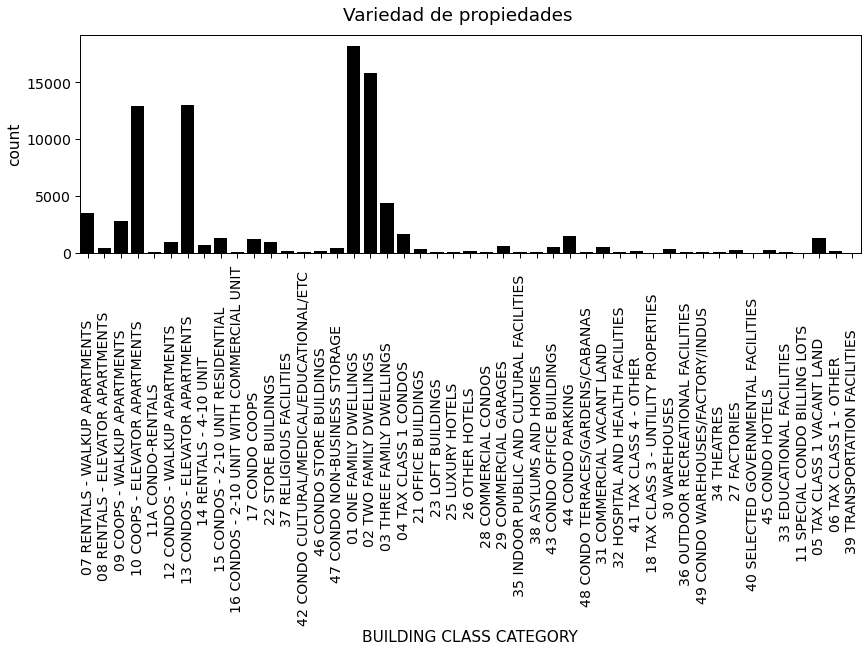

In [ ]:
# property_type
plt.figure(figsize=(14,4))
plt.suptitle("Variedad de propiedades")
sns.countplot(x="BUILDING CLASS CATEGORY", data=df2, color="black")
plt.xticks(rotation=90)
plt.rcParams["font.size"]=13.5



**En este gráfico podemos observar la cantidad de datos que hay por tipo de construcción, tomaré los dos centros departamentales con más cantidad de datos.**

In [ ]:
# vuelvo a cargar el dataset
df2 = pd.read_csv("nyc-rolling-sales.csv")
# transformo la variable SALE PRICE, a price
df2 = df2.rename({'SALE PRICE': 'price'}, axis=1)
# transformo la variable price, a una variable de tipo float(estaba en tipo object)
df2['price'] = pd.to_numeric(df2['price'],errors = 'coerce')
# transformo la variable GROSS SQUARE FEET, a una variable de tipo float(estaba en tipo object)
df2['GROSS SQUARE FEET'] = pd.to_numeric(df2['GROSS SQUARE FEET'],errors = 'coerce')
# transformo la variable TOTAL UNITS, a una variable de tipo float(estaba en tipo object)
df2['TOTAL UNITS'] = pd.to_numeric(df2['TOTAL UNITS'],errors = 'coerce')
# FILTRO EL DATASET POR LOS DOS TIPOS DE CONSTRUCCION DEPARTAMENTALES CON MAS DATOS.
df2nn = df2[df2["BUILDING CLASS CATEGORY"].str.contains("10 COOPS|13 CONDOS")]
df2nn = df2nn.dropna()

A continuación creare la variable de superficie por unidad departamental en pies cuadrados (square feet), que lo haré dividiendo GROSS SQUARE FEET, que sería el área del edificio en pies, dividido las unidades totales por edificio.
A continuacion de ello, creo la variable SUPERFICIE POR UNIDAD EN METROS, la cual contiene los valores llevados pies cuadrados a metros cuadrados.

In [ ]:
df2nn["SUPERFICIE POR UNIDAD EN PIES"] = df2nn['GROSS SQUARE FEET']/df2nn['TOTAL UNITS']
df2nn['SUPERFICIE POR UNIDAD EN METROS'] = df2nn['SUPERFICIE POR UNIDAD EN PIES']/10.76391041671
df2nn['m2_price'] = df2nn['price']/df2nn['SUPERFICIE POR UNIDAD EN METROS']
# Aquí, aplico un filtro para eliminar datos erroneos que fueron apareciendo
df2nn[(df2nn["m2_price"] > 500) & (df2nn["m2_price"] < 15000)]


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,price,SALE DATE,SUPERFICIE POR UNIDAD EN PIES,SUPERFICIE POR UNIDAD EN METROS,m2_price
7837,7841,1,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1341,44,,D4,310 EAST 49TH STREET,...,7531,60043.0,1959,2,D4,318000.0,2017-04-12 00:00:00,588.656863,54.688012,5814.802696
10125,10129,1,MURRAY HILL,10 COOPS - ELEVATOR APARTMENTS,2,915,38,,D4,240 EAST 35TH STREET,...,12343,91745.0,1955,2,D4,650000.0,2017-02-03 00:00:00,758.223140,70.441235,9227.549777
14185,14189,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1562,18,,D4,431 EAST 82ND STREET,...,2554,10560.0,1910,2,D4,550000.0,2017-03-29 00:00:00,754.285714,70.075436,7848.684679
15386,15390,1,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1162,29,,D4,201 WEST 70TH STREET,...,34300,421205.0,1971,2,D4,71669.0,2017-06-08 00:00:00,1066.341772,99.066392,723.444130
16658,16662,1,UPPER WEST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1195,29,,D4,211 CENTRAL PARK WEST,...,40350,600613.0,1929,2,D4,1400000.0,2017-01-05 00:00:00,3111.984456,289.112816,4842.400339
20064,1762,2,EAST TREMONT,10 COOPS - ELEVATOR APARTMENTS,2,3080,4,,D4,2024 HUGHES AVENUE,...,5461,32932.0,1912,2,D4,71500.0,2017-02-07 00:00:00,1176.142857,109.267247,654.358941
20680,2378,2,KINGSBRIDGE/JEROME PARK,10 COOPS - ELEVATOR APARTMENTS,2,3260,5,,D4,2860 BAILEY AVENUE,...,26160,77760.0,1955,2,D4,288381.0,2017-02-13 00:00:00,996.923077,92.617184,3113.687828
23070,4768,2,RIVERDALE,10 COOPS - ELEVATOR APARTMENTS,2,5909,31,,D4,4499 HENRY HUDSON PARKWAY,...,43750,70000.0,1952,2,D4,180000.0,2017-01-12 00:00:00,1206.896552,112.124359,1605.360354
23239,4937,2,RIVERDALE,10 COOPS - ELEVATOR APARTMENTS,2,5953,550,,D4,5635 NETHERLAND AVENUE,...,134075,395000.0,1949,2,D4,150000.0,2017-06-27 00:00:00,854.978355,79.430088,1888.453144
39348,13997,3,FLATLANDS,10 COOPS - ELEVATOR APARTMENTS,2,7869,11,,D4,2239 TROY AVENUE,...,30712,113900.0,1953,2,D4,127500.0,2016-11-18 00:00:00,1324.418605,123.042515,1036.227197


In [ ]:
# Reviso si hay datos nan, y en efecto los hay.
df2nn.isnull().sum().sort_values(ascending=False)

m2_price                           3857
SUPERFICIE POR UNIDAD EN METROS    3342
SUPERFICIE POR UNIDAD EN PIES      3342
COMMERCIAL UNITS                      0
SALE DATE                             0
price                                 0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
Unnamed: 0                            0
BOROUGH                               0
ZIP CODE                              0
APARTMENT NUMBER                      0
ADDRESS                               0
BUILDING CLASS AT PRESENT             0
EASE-MENT                             0
LOT                                   0
BLOCK                                 0
TAX CLASS AT PRESENT                  0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
RESIDENTIAL UNITS                     0


In [ ]:
# Dropeo los datos nan
df2nn = df2nn.dropna()

In [ ]:
df2nn.isnull().sum().sort_values(ascending=False)

Unnamed: 0                         0
COMMERCIAL UNITS                   0
SUPERFICIE POR UNIDAD EN METROS    0
SUPERFICIE POR UNIDAD EN PIES      0
SALE DATE                          0
price                              0
BUILDING CLASS AT TIME OF SALE     0
TAX CLASS AT TIME OF SALE          0
YEAR BUILT                         0
GROSS SQUARE FEET                  0
LAND SQUARE FEET                   0
TOTAL UNITS                        0
RESIDENTIAL UNITS                  0
BOROUGH                            0
ZIP CODE                           0
APARTMENT NUMBER                   0
ADDRESS                            0
BUILDING CLASS AT PRESENT          0
EASE-MENT                          0
LOT                                0
BLOCK                              0
TAX CLASS AT PRESENT               0
BUILDING CLASS CATEGORY            0
NEIGHBORHOOD                       0
m2_price                           0
dtype: int64

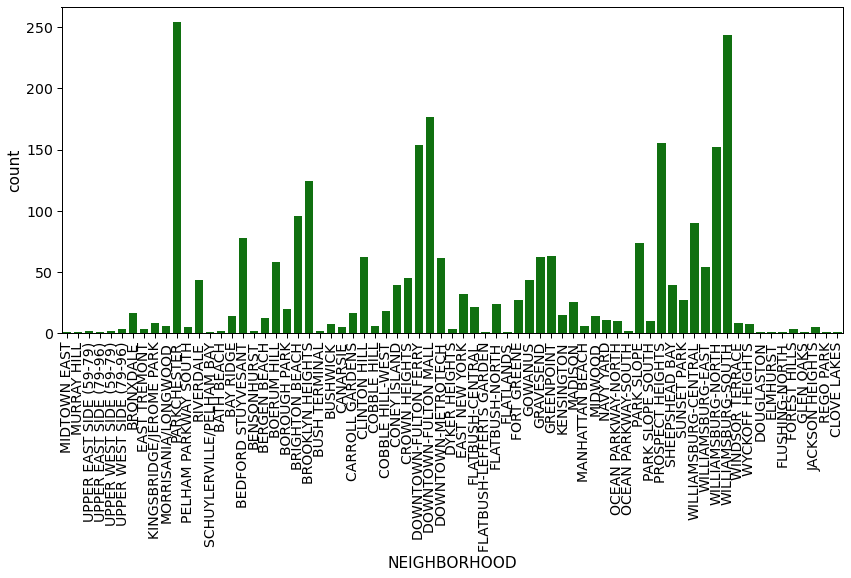

In [ ]:
# Paso a contar las cantidad de propiedades en cada localidad de New york.
plt.figure(figsize=(14,6))
sns.countplot(x="NEIGHBORHOOD", data=df2nn, color="green")
plt.xticks(rotation=90)
plt.rcParams["font.size"]=9

In [ ]:
df2nn.shape

(2578, 25)

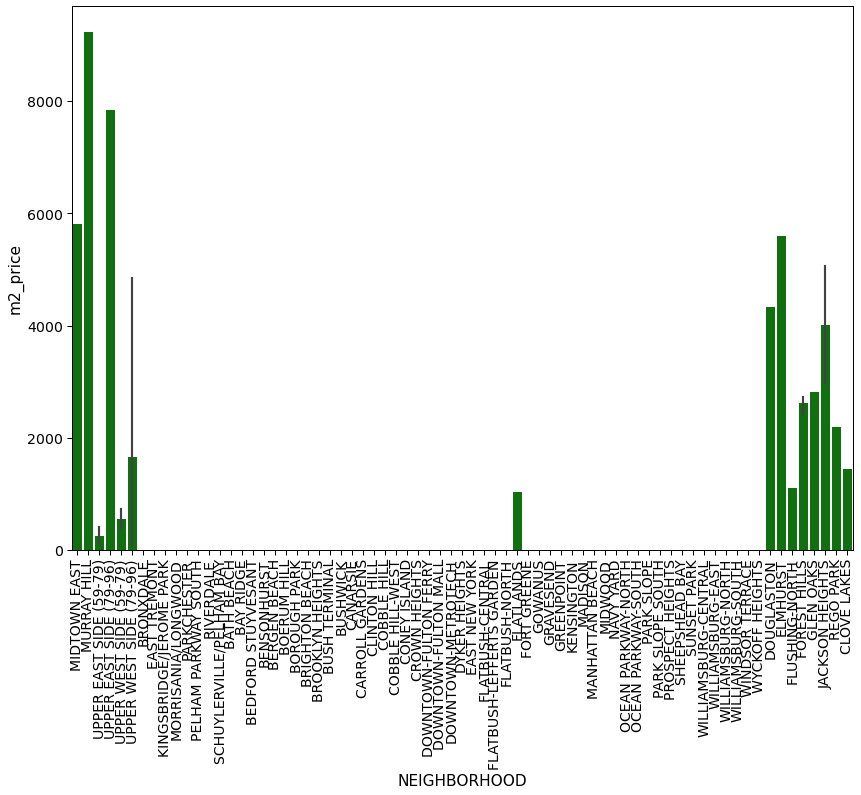

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(y="m2_price",x="NEIGHBORHOOD", data=df2nn, color="green")
plt.xticks(rotation=90)
plt.rcParams["font.size"]=9

### Podemos llegar a la respuesta a través de este gráfico; que el precio mas caro del metro cuadrado esta en MURRAY HILL, que es un sector de la isla de MANHATTAN, el cual eleva su precio hasta por encima de los 9000usd. Como conclusión en respecto al dataset, puedo decir que tuve que limpiar muchos datos, y que a la hora final de gráficar lo que nos llevó a la respuesta, se puede observar como afecto directamente esos filtrados al dataset, pero los datos que quedaron, tienen un alto valor informativo.

# CONCLUSIÓN DEL PROYECTO:

Yo creo que como conclusión, sería lo más correcto decir, que el dataset tiene distintas formas de encararlo, creo que los modelos de predicción se pueden mejorar, y mucho. Se podría hacer un tratado con los datos más amplio y así mejorar los resultados que arrojan las métricas de los modelos.

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

# PROYECTO 2

Vuelvo a importar el dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/A/DS_Proyecto_01_Datos_Properati.csv")


Dejo el dataset con sus variables a tener en cuenta.

In [ ]:
dfn = pd.DataFrame (df[df.property_type.isin(["Departamento", "PH", "Casa"])
                    & (df.l2 == "Capital Federal")])
dfn = dfn[["lat", "lon", "rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms", "property_type", "price"]]

#separamos las variables de localizacion para luego usarlas en el clustering

### Transformaciones de datos:

+ **Creación de variables dummy**
+ **Encoding**
+ **Imputación de valores faltantes**
+ **Detección y eliminación de outliers**
+ **Escalado de datos**



### Creo variables dummy

Crear variables dummy me sirve para codificar las variables categóricas.

In [ ]:
dummies = pd.get_dummies(dfn.property_type)

Las uno junto con mi dataset.

In [ ]:
merged = pd.concat([dfn,dummies], axis="columns")

Hago drop de las columnas que no me sirven.

In [ ]:
final = merged.drop(["property_type","Casa"], axis="columns")

Así queda el dataset hasta ahora.

In [ ]:
final

,lat,lon,rooms,surface_covered,surface_total,bedrooms,bathrooms,price,Departamento,PH
0,-34.61,-58.38,7.00,140.00,140.00,7.00,2.00,153000.00,1,0
1,-34.62,-58.41,2.00,58.00,70.00,1.00,2.00,159000.00,0,1
2,-34.59,-58.43,2.00,45.00,45.00,1.00,1.00,125000.00,0,1
3,-34.58,-58.44,2.00,50.00,85.00,1.00,1.00,295000.00,0,1
5,-34.59,-58.44,2.00,56.00,56.00,1.00,1.00,150000.00,0,1
...,...,...,...,...,...,...,...,...,...,...
146554,-34.59,-58.43,4.00,111.00,175.00,3.00,3.00,570000.00,0,1
146555,-34.59,-58.43,3.00,134.00,144.00,2.00,2.00,480000.00,0,1
146556,-34.58,-58.44,4.00,143.00,317.00,2.00,2.00,530000.00,0,1
146557,-34.58,-58.42,3.00,145.00,145.00,2.00,2.00,420000.00,1,0


Re-ubico las variables para que tengan mas sentido y que el modelo aprenda mejor. 

In [ ]:
dff = final[["price", "lat", "lon", "rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms","Departamento", "PH"]]

### Realizo filtrados por condiciones a raíz de haber valores no lógicos.

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.surface_total.quantile(0.25)
Q3 = dff.surface_total.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.surface_total > Lower_Fence]
dff = dff[dff.surface_total < Upper_Fence]
dff.shape

(76236, 10)

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.surface_covered.quantile(0.25)
Q3 = dff.surface_covered.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.surface_covered > Lower_Fence]
dff = dff[dff.surface_covered < Upper_Fence]
dff.shape

(72317, 10)

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.bathrooms.quantile(0.25)
Q3 = dff.bathrooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.bathrooms > Lower_Fence]
dff = dff[dff.bathrooms < Upper_Fence]
dff.shape

(70997, 10)

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.rooms.quantile(0.25)
Q3 = dff.rooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.rooms > Lower_Fence]
dff = dff[dff.rooms < Upper_Fence]
dff.shape

(68710, 10)

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.bedrooms.quantile(0.25)
Q3 = dff.bedrooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.bedrooms > Lower_Fence]
dff = dff[dff.bedrooms < Upper_Fence]
dff.shape

(68628, 10)

In [ ]:
#Rango intercuartilico para trtar outliers


Q1 = dff.price.quantile(0.25)
Q3 = dff.price.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


dff= dff[dff.price > Lower_Fence]
dff = dff[dff.price < Upper_Fence]
dff.shape

(65313, 10)

### Observo que cantidad de valores faltantes tengo.

In [ ]:
dff.isnull().sum().sort_values(ascending=False)

lon                2903
lat                2903
PH                    0
Departamento          0
bathrooms             0
bedrooms              0
surface_total         0
surface_covered       0
rooms                 0
price                 0
dtype: int64

La idea sería no perder valores faltantes que podrían ser valiosos, así que rellenamos a bathrooms con su media.

In [ ]:
dfff = dff["bathrooms"].fillna(dff["bathrooms"].mean())

**se creó la variable new_bathrooms.**

In [ ]:
dff["new_bathrooms"] = dfff

In [ ]:
dff = dff[["price", "lat", "lon", "rooms", "surface_covered", "surface_total",  "bedrooms", "new_bathrooms","Departamento", "PH"]]

In [ ]:
dff = dff.dropna()

Vuelvo a consultar los valores faltantes.

In [ ]:
dff.isnull().sum().sort_values(ascending=False)
dff.shape

(62410, 10)

Así va el dataset hasta ahora.

In [ ]:
dff

,price,lat,lon,rooms,surface_covered,surface_total,bedrooms,new_bathrooms,Departamento,PH
1,159000.00,-34.62,-58.41,2.00,58.00,70.00,1.00,2.00,0,1
2,125000.00,-34.59,-58.43,2.00,45.00,45.00,1.00,1.00,0,1
3,295000.00,-34.58,-58.44,2.00,50.00,85.00,1.00,1.00,0,1
5,150000.00,-34.59,-58.44,2.00,56.00,56.00,1.00,1.00,0,1
6,159500.00,-34.60,-58.43,2.00,70.00,70.00,1.00,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...
146541,400000.00,-34.58,-58.43,3.00,80.00,111.00,2.00,2.00,1,0
146542,170000.00,-34.58,-58.44,2.00,80.00,80.00,1.00,1.00,1,0
146543,225000.00,-34.58,-58.43,3.00,81.00,85.00,2.00,2.00,1,0
146545,399000.00,-34.58,-58.44,3.00,82.00,88.00,2.00,2.00,1,0


In [ ]:
data_columns = dff.columns

In [ ]:
data_columns

Index(['price', 'lat', 'lon', 'rooms', 'surface_covered', 'surface_total',
       'bedrooms', 'new_bathrooms', 'Departamento', 'PH'],
      dtype='object')

### Escalamos los datos para que el modelo pueda entender mejor los datos.

Con el escalado de datos le facilitamos al modelo valores que pueda aprender más fácilmente.

Importo StandardScaler de scikit y realizo dicho escalado.

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [ ]:
dff = st.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(dff, columns = data_columns)

In [ ]:
dff

,price,lat,lon,rooms,surface_covered,surface_total,bedrooms,new_bathrooms,Departamento,PH
0,-0.18,-1.09,0.72,-0.69,-0.09,0.05,-0.93,1.38,-2.76,2.87
1,-0.62,0.23,0.28,-0.69,-0.63,-0.77,-0.93,-0.56,-2.76,2.87
2,1.57,0.76,0.01,-0.69,-0.42,0.54,-0.93,-0.56,-2.76,2.87
3,-0.30,0.22,-0.12,-0.69,-0.18,-0.41,-0.93,-0.56,-2.76,2.87
4,-0.18,-0.09,0.12,-0.69,0.40,0.05,-0.93,-0.56,-2.76,2.87
...,...,...,...,...,...,...,...,...,...,...
62405,2.93,0.80,0.15,0.44,0.81,1.39,0.41,1.38,0.36,-0.35
62406,-0.04,0.88,0.04,-0.69,0.81,0.37,-0.93,-0.56,0.36,-0.35
62407,0.67,0.75,0.10,0.44,0.85,0.54,0.41,1.38,0.36,-0.35
62408,2.92,0.76,-0.16,0.44,0.89,0.64,0.41,1.38,0.36,-0.35


# Modelaje con los nuevos datos.

Importo librerías a usar.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

## DESAFIO: CLUSTERING

In [ ]:
lat_lon = dff[["lat","lon"]]
lat_lon.head()

,lat,lon
0,-1.09,0.72
1,0.23,0.28
2,0.76,0.01
3,0.22,-0.12
4,-0.09,0.12


El precio entre los barrios de Buenos Aires varia mucho, si nosotros entrenamos un modelo de aprendisaje no supervisado, tomando como feature inicial la lat y la lon de Buenos Aires, podremos llegar a lograr que los centroides se coloquen por encima de cada barrio, y asi obtener una silueta lo mas aproximada que se pueda a Buenos Aires.

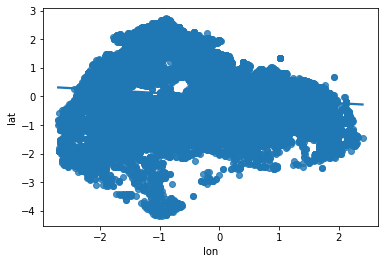

In [ ]:
# use the function regplot to make a scatterplot
sns.regplot(x=lat_lon["lon"], y=lat_lon["lat"])

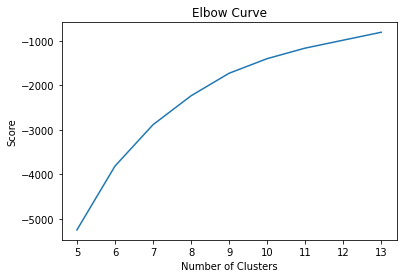

In [ ]:
K_clusters = range(5,14)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
y_lat = lat_lon[['lat']]
X_lon = lat_lon[['lon']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 9, init ='k-means++')
kmeans.fit(dff[dff.columns[0:2]]) # Compute k-means clustering.
dff['cluster_label'] = kmeans.fit_predict(dff[dff.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(dff[dff.columns[1:3]]) # Labels of each point
dff.head(10)

,price,lat,lon,rooms,surface_covered,surface_total,bedrooms,new_bathrooms,Departamento,PH,cluster_label
0,-0.18,-1.09,0.72,-0.69,-0.09,0.05,-0.93,1.38,-2.76,2.87,5
1,-0.62,0.23,0.28,-0.69,-0.63,-0.77,-0.93,-0.56,-2.76,2.87,1
2,1.57,0.76,0.01,-0.69,-0.42,0.54,-0.93,-0.56,-2.76,2.87,0
3,-0.30,0.22,-0.12,-0.69,-0.18,-0.41,-0.93,-0.56,-2.76,2.87,3
4,-0.18,-0.09,0.12,-0.69,0.40,0.05,-0.93,-0.56,-2.76,2.87,3
5,-0.18,-0.09,0.12,-0.69,0.40,0.05,-0.93,-0.56,-2.76,2.87,3
6,-1.09,-1.77,0.50,-1.83,-0.96,-0.77,-0.93,-0.56,-2.76,2.87,8
7,-1.09,-1.77,0.50,-1.83,-0.96,-0.77,-0.93,-0.56,-2.76,2.87,8
8,-0.04,0.55,-1.71,-0.69,-0.46,-0.08,-0.93,1.38,-2.76,2.87,3
9,-0.31,-0.21,1.60,-0.69,-0.05,-0.02,-0.93,-0.56,0.36,-0.35,3


<Figure size 1440x720 with 0 Axes>

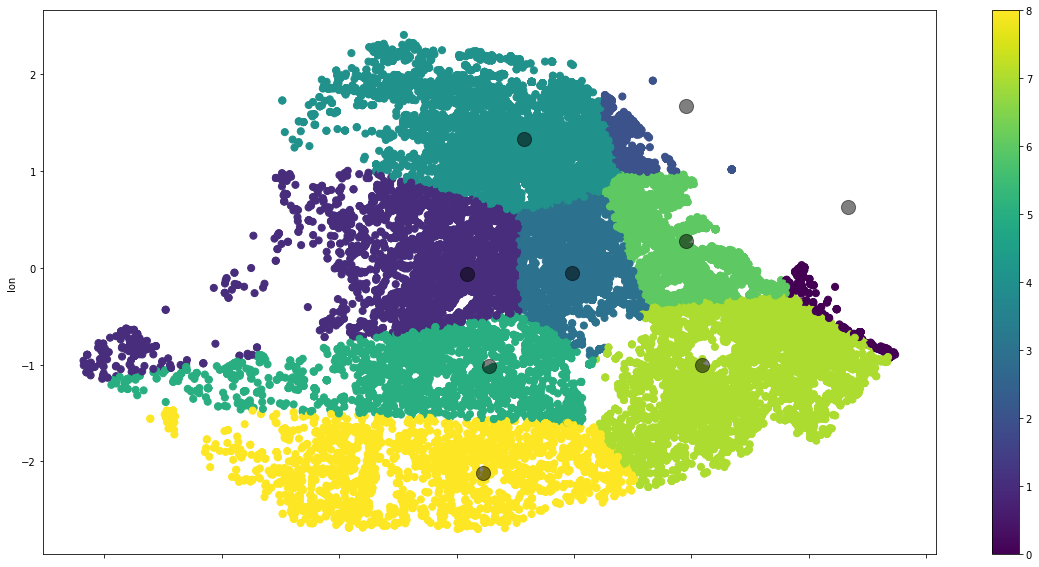

<Figure size 1440x720 with 0 Axes>

In [ ]:
lat_lon.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.gcf().set_size_inches(20, 10)
plt.figure(figsize=(20,10))

### Defino las variables X_train, y_train, X_test e y_test.

In [ ]:
dff = dff[["price","lat", "lon", "rooms", "surface_covered", "surface_total",  "bedrooms", "new_bathrooms","Departamento", "PH"]]

In [ ]:
# VUELVO A CARGAR X E Y
X = dff.iloc[:, 1:10].values
y = dff.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 422)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 532)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25, random_state = 892)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.25, random_state = 89)

# Modelaje

**Realizo nuevamente el tree regressor hecho en el proyecto 1**

*siempre optimizo sus hiperparametros*

In [ ]:
regression = DecisionTreeRegressor(max_depth=100, min_samples_split=2, min_samples_leaf=2, random_state=3)

hago el fit

In [ ]:
regression.fit(X_train1, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

Consulto sus resultados mediante las mismas métricas utilizadas en el proyecto 1.

Raíz del error cuadrático medio en Train: 0.1453606382973619
Raíz del error cuadrático medio en Test: 0.383641918241261
Error de R cuadrado en test, asociado con el regression tree:  0.8532699360800329
Error de R cuadrado en train, asociado con el regresion tree:  0.9788424080485869


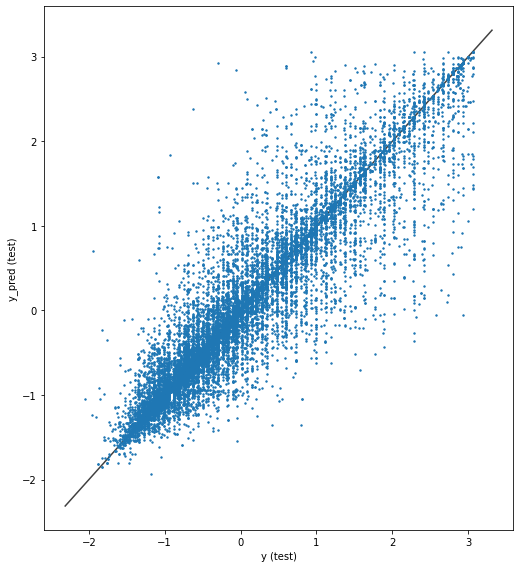

In [ ]:
y_train_pred1 = regression.predict(X_train1)
y_test_pred1 = regression.predict(X_test1)
rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train1}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test1}')
r_square1 = metrics.r2_score(y_test1, y_test_pred1)
print('Error de R cuadrado en test, asociado con el regression tree: ', r_square1)
r_square1 = metrics.r2_score(y_train1, y_train_pred1)
print('Error de R cuadrado en train, asociado con el regresion tree: ', r_square1)

plt.figure(figsize = (14,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test1,y_test_pred1, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**Observamos una subida de rendimiento del modelo muy positiva, esto se debe a que el modelo ahora es capaz de entender mejor los datos que está aprendiendo, debido a qué se incorporaron codificaciones de variables categóricas y se escalaron los datos para darles valores que el modelo pueda comprender mejor. Por otra parte, en el anterior modelo con respecto a los outliers, se hizo un tratado de directa eliminación, aquí se observo su cantidad, y luego se los rellenó, para no perder información valiosa (imputer).**

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_para = {"min_samples_split":[1,2,3],'min_samples_leaf':[1,2,3],'max_depth':[17,18,30,100]}
clf = GridSearchCV(regression, tree_para, cv=5, n_jobs=-1)
clf.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=100, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=3, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [17, 18, 30, 100],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             pre_dispatch='2*n_jobs

In [ ]:
clf.best_params_

{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Modelaje avanzado.

### **RANDOM FOREST**

Importo el RandomForestRegressor de scikit.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Optimizo los hiperparámetros.**

In [ ]:
regression1 = RandomForestRegressor(max_depth= 20, bootstrap= True, max_features= "log2", min_samples_split= 2, n_estimators= 480)


Realizo el fit

In [ ]:
regression1.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=480, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Consulto sus resultados.**

In [ ]:
y_train_pred = regression1.predict(X_train)
y_test_pred = regression1.predict(X_test)

Raíz del error cuadrático medio en Train, para el modelo de Benchmark: 0.1449924332276097
Raíz del error cuadrático medio en Test, para el modelo de Benchmark: 0.3030990079247291
Error de R cuadrado en test, asociado con la random forest regressor, usada para benchmark:  0.9074911140841854
Error de R cuadrado en train, asociado con el random forest regressor, usada para benchmark: 0.9790491479034751


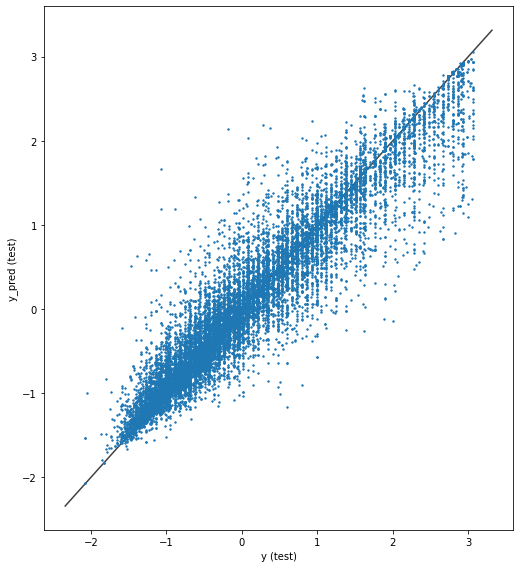

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train, para el modelo de Benchmark: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test, para el modelo de Benchmark: {rmse_test}')
r_square = metrics.r2_score(y_test, y_test_pred)
print('Error de R cuadrado en test, asociado con la random forest regressor, usada para benchmark: ', r_square)
r_square = metrics.r2_score(y_train, y_train_pred)
print('Error de R cuadrado en train, asociado con el random forest regressor, usada para benchmark:', r_square)
plt.figure(figsize = (14,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [ ]:
   # clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
clf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
# print(clf.cv_results_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 59.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 70.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=480, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
   param_grid = { 
            "n_estimators"      : [10,20,30,200,430,480],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [ ]:
print(clf.best_params_)


{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 480}


### **REGRESIÓN LINEAL CON ATRIBUTOS POLINÓMICOS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import math

In [ ]:
train_error = []
test_error = []
#function for avoid duplication of list elements
def my_function(x):
    return list(dict.fromkeys(x))
for i in range(1,8):
        poly = PolynomialFeatures(degree=i)
        Modified_X_train = poly.fit_transform(X_train)
        Modified_X_test = poly.fit_transform(X_test)
        #To display number of training and testing points being considered for building the model
        if i == 1:
            print ('The number of Training points are :', Modified_X_train.shape[0])
            print ('The number of Testing points are  :',Modified_X_test.shape[0])
        reg = LinearRegression()
        reg.fit(Modified_X_train,y_train)
        print ('The RMSE of the Trainining data for model of degree',i, 'is :',math.sqrt(metrics.mean_squared_error(y_train,reg.predict(Modified_X_train))))
        print ('The RMSE of the Testing data for model of degree',i, 'is :',math.sqrt(metrics.mean_squared_error(y_test,reg.predict(Modified_X_test))))
        train_error.append(math.sqrt(metrics.mean_squared_error(y_train,reg.predict(Modified_X_train))))
        test_error.append(math.sqrt(metrics.mean_squared_error(y_test,reg.predict(Modified_X_test))))
train_error = my_function (train_error)
test_error = my_function(test_error)

The number of Training points are : 41606
The number of Testing points are  : 20804
The RMSE of the Trainining data for model of degree 1 is : 0.5581572912274821
The RMSE of the Testing data for model of degree 1 is : 0.5575169512217338
The RMSE of the Trainining data for model of degree 2 is : 0.5170893805404225
The RMSE of the Testing data for model of degree 2 is : 0.5178494767227775
The RMSE of the Trainining data for model of degree 3 is : 0.4966499969200049
The RMSE of the Testing data for model of degree 3 is : 0.49924738399644497
The RMSE of the Trainining data for model of degree 4 is : 0.47314276212177325
The RMSE of the Testing data for model of degree 4 is : 14999656.720475186
The RMSE of the Trainining data for model of degree 5 is : 0.44745779138373026
The RMSE of the Testing data for model of degree 5 is : 136860170.4380875
The RMSE of the Trainining data for model of degree 6 is : 0.42243931100872945
The RMSE of the Testing data for model of degree 6 is : 13088774.63598

In [ ]:
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn import metrics
import math
poly3 = PolynomialFeatures(degree=7)
Modified_X_train3 = poly3.fit_transform(X_train3)
Modified_X_test3 = poly3.fit_transform(X_test3)
reg3 = LinearRegression()
reg3.fit(Modified_X_train3,y_train3)
ridg = Ridge()
ridg.fit(Modified_X_train3,y_train3)
ridg_Reg_Train_RMSE = math.sqrt(metrics.mean_squared_error(y_train3,ridg.predict(Modified_X_train3)))
ridg_Reg_Test_RMSE = math.sqrt(metrics.mean_squared_error(y_test3,ridg.predict(Modified_X_test3)))
#Discusion over ridge and normal polynomial regression
#Here we can see the ridge regression model is giving higher Test RMSE,
# I believe because ,it has been suggested in problem to take the regularization as default (which is 1)
#And we know that for higher values of lamda regularization parameter ,we will be having Higher bias, less variance 
#resulting in not optimal model,but worse model than normal polynomial regression as we are getting higher bias impacting the Error
#i.e Expected error = bias^2+variance+noise, so increased bias ,impacting error in ridge regression
#We should be taking the optimal value of regularization parameter
#i.e not so low(shouldnt be 0 or closer to 0),not so high(shouldnt be1 or closer to 1)

In [ ]:
print('Train RMSE of polynomial regression of model of degree 7 is :',Poly_Reg_Train_RMSE)
print('Test RMSE of polynomial regression of model of degree 7 is :',Poly_Reg_Test_RMSE)
print('Train RMSE of ridge regression of model of degree 7 is :',ridg_Reg_Train_RMSE)
print('Test RMSE of ridge regression of model of degree 7 is :',ridg_Reg_Test_RMSE)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import math
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7)
Modified_X_train = poly.fit_transform(X_train)
Modified_X_test = poly.fit_transform(X_test)
reg = LinearRegression()
reg.fit(Modified_X_train,y_train)
Poly_Reg_Train_RMSE = math.sqrt(metrics.mean_squared_error(y_train,reg.predict(Modified_X_train)))
Poly_Reg_Test_RMSE = math.sqrt(metrics.mean_squared_error(y_test,reg.predict(Modified_X_test)))
les = Lasso (alpha=0.1)
les.fit(Modified_X_train,y_train)
Lasso_Reg_Train_RMSE = math.sqrt(metrics.mean_squared_error(y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = math.sqrt(metrics.mean_squared_error(y_test,les.predict(Modified_X_test)))
#Discusion over lasso and normal polynomial regression
#Here we can see the lasso regression model is giving higher Test RMSE,
# I believe because ,it has been suggested in problem to take the regularization as default (which is 1)
#And we know that for higher values of lamda regularization parameter ,we will be having Higher bias, less variance 
#resulting in not optimal model,but worse model than normal polynomial regression as we are getting higher bias impacting the Error
#i.e Expected error = bias^2+variance+noise, so increased bias ,impacting error in lasso
#We should be taking the optimal value of regularization parameter
#i.e not so low(shouldnt be 0 or closer to 0),not so high(shouldnt be1 or closer to 1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500865862445172.6, tolerance: 495118377021.2423
  positive)


Train RMSE of polynomial regression of model of degree 7 is : 113640.43613325202
Test RMSE of polynomial regression of model of degree 7 is : 227250886.81963667
Train RMSE of Lasso regression of model of degree 7 is : 135543.39716947978
Test RMSE of Lasso regression of model of degree 7 is : 173616.64254391677


In [ ]:
print('Train RMSE of polynomial regression of model of degree 7 is :',Poly_Reg_Train_RMSE)
print('Test RMSE of polynomial regression of model of degree 7 is :',Poly_Reg_Test_RMSE)
print('Train RMSE of Lasso regression of model of degree 7 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 7 is :',Lasso_Reg_Test_RMSE)

# Conclusiones

### **El modelo que mejor se desempeño fue el modelo de ensamble de regression tree (random forest regressor).**

###ESTOS FUERON SUS RESULTADOS

Raíz del error cuadrático medio en Train, para el modelo de Benchmark: 0.1449924332276097


Raíz del error cuadrático medio en Test, para el modelo de Benchmark: 0.3030990079247291


Error de R cuadrado en test, asociado con la random forest regressor, usada para benchmark:  0.9074911140841854


Error de R cuadrado en train, asociado con el random forest regressor, usada para benchmark: 0.9790491479034751






### **El modelo que le sigue es el árbol de desición entrenado con los datos reentrenados, estos son sus resultados:**

Raíz del error cuadrático medio en Train: 0.1453606382973619 **(Se observa una direncia de +100000)**


Raíz del error cuadrático medio en Test: 0.383641918241261 **(Se observa una direncia de +100000)**


Error de R cuadrado en test, asociado con el regression tree:  0.8532699360800329 **(El modelo de ensamble alcanza los 88!)**


Error de R cuadrado en train, asociado con el regresion tree:  0.9788424080485869






# Interpretación de modelos.

###**¿Que variables fueron relevantes para el modelo, para realizar una predicción?¿Cuáles no?**


In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=702812d721231767465bd941892be05b6ffff2d635f780bf08f48285c9d8c070
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


### Entendiendo un poco más.
Para generar **confianza** en el modelo, ejecutamos múltiples *validaciones cruzadas* y realizamos una validación de conjuntos de reserva. Estas simulaciones brindan una *vista agregada del desempeño del modelo sobre datos desconocidos*. **Esto no ayuda a comprender por qué algunas de nuestras predicciones son correctas mientras que otras son incorrectas ni podemos rastrear la ruta de decisión de nuestro modelo**. 

En otras palabras, *no podemos entender su aprendizaje o descubrir sus falsas conclusiones*.

 Pero, ¿qué pasa si les digo que **existe una herramienta que explica el límite de decisión de su modelo de una manera comprensible para los humanos**?
 
 El nombre de esta biblioteca mágica es **LIME**.

In [ ]:
import lime
import lime.lime_tabular

### ¿Qué es LIME?
LIME (Explicaciones agnósticas del modelo interpretable local) es una técnica de explicación novedosa que explica la predicción de algunos modelos de una manera interpretable y fiel mediante el aprendizaje de un modelo interpretable localmente alrededor de la predicción.

**Proporciona una comprensión cualitativa entre las variables de entrada y la respuesta. Debería ser fácil de entender.**

Puede que no sea posible que una explicación sea completamente fiel a menos que sea la descripción completa del modelo en sí. Dicho esto, debe ser al menos fiel a nivel local, es decir, debe replicar el comportamiento del modelo en las proximidades de la instancia que se predice.

¿Qué hace que LIME sea un buen explicador de modelos?
Veamos cómo se mide LIME frente a estas características:
1. Representaciones de datos interpretables
LIME utiliza una representación que los humanos entienden independientemente de las características reales utilizadas por el modelo. Esto se acuña como representación interpretable. Una representación interpretable variaría con el tipo de datos con los que estamos trabajando, por ejemplo:
1. Para texto: Representa la presencia / ausencia de palabras.
2. Por imagen: Representa la presencia / ausencia de superpíxeles (parche contiguo de píxeles similares).
3. Para datos tabulares: es una combinación ponderada de columnas.
En resumen, el explicador de LIME es interpretable incluso por no expertos.

La librería lime nos pide por una parte que guardemos un dataset solo con las columnas de los features, y otro con las features categóricas.

In [ ]:
pedroso = dff[["lat","lon","rooms","surface_covered", "surface_total", "bedrooms", "new_bathrooms", "Departamento", "PH"]]

In [ ]:
rocoso = dff[["Departamento", "PH"]]

**Creámos el explainer**

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=pedroso, class_names=['price'], categorical_features=rocoso, verbose=True, mode='regression')

In [ ]:
i = 25
exp = explainer.explain_instance(X_test[i], regression1.predict, num_features=7)

Intercept -0.3153686599054235
Prediction_local [0.74759072]
Right: 2.062954675378097


**A continuacion los resultados:**

In [ ]:
exp.show_in_notebook(show_table=True)

**A CONTINUACIÓN LAS VARIABLES QUE FUERON RELEVANTES PARA LAS PREDICCIONES:**

⚫ lat

⚫ lon

⚫ new_bathrooms

⚫ surface_total

⚫ surface_covered

⚫ rooms

⚫ bedrooms

⚫ Departamento

**A CONTINUACIÓN LAS VARIABLES QUE NO FUERON RELEVANTES PARA LAS PREDICCIONES:**

⚫ PH

Cuando al Random Forest Regressor se le asigna el problema de predecir valores no vistos anteriormente, siempre predecirá un promedio de los valores vistos anteriormente. Obviamente, el promedio de una muestra no puede caer fuera de los valores más altos y más bajos de la muestra.

El regresor de bosque aleatorio no puede descubrir tendencias que le permitan extrapolar valores que quedan fuera del conjunto de entrenamiento. Cuando se enfrenta a tal escenario, el regresor asume que la predicción caerá cerca del valor máximo en el conjunto de entrenamiento

###**¿Cómo es la distribución de los errores? ¿A donde crees que fallan los modelos? ¿A que se debe?**

### Distribución de errores.

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import train_test_split as tts

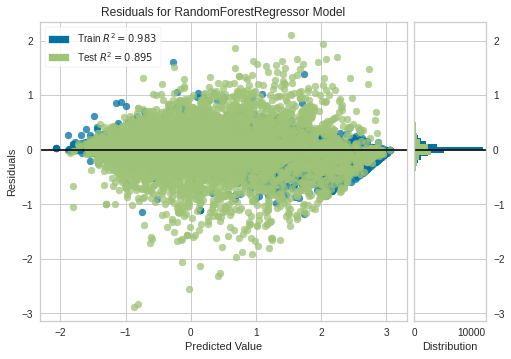

In [ ]:
viz = residuals_plot(RandomForestRegressor(), X_train, np.ravel(y_train,order='C'))

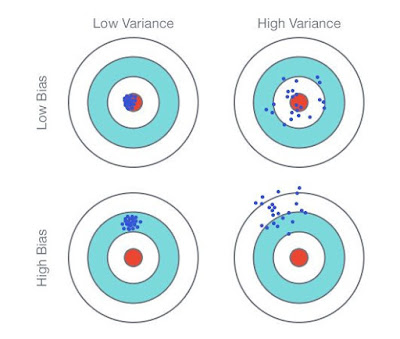

Cito los resultados del random forest regressor:

Raíz del error cuadrático medio en Train, para el modelo de Benchmark: 0.1449924332276097


Raíz del error cuadrático medio en Test, para el modelo de Benchmark: 0.3030990079247291


Error de R cuadrado en test, asociado con la random forest regressor, usada para benchmark:  0.9074911140841854


Error de R cuadrado en train, asociado con el random forest regressor, usada para benchmark: 0.9790491479034751


Aqui lo que tenemos es un caso de **bajo sesgo** y **alta varianza** ¿Por qué? porque tenemos un buen rendimineto en entrenamiento y no asi en testeo.


¿Qué soluciones podemos aplicar?

Añadir datos variados nos ayudaría mucho, pero en ciertos lugares. En nuestros datos tenemos algunas cuantas features categoricas, las cuáles hay algunas secciones que no tienen mucha cantidad de datos, por lo que, el modelo no es que lo haya aprendido y esta prediciendo mal, sino que nunca lo entrenamos para dichos casos que predice mal, por la falta de datos.

# CONCLUSIONES:



*   En la primer parte del proyecto no tenia a disposición tantas opciones de tratado de datos, como también no disponia de todas las variables para predecir. En la segunda parte incorporando muchos mas metodos pude mantener un orden en mis datos, y una correlación mas grande, así también obteniendo muchísimos mejores resultados en los modelajes.

*   En el momento que incorporamos un modelo avanzado que se adapte bien a los datos [ no como el polynomial features :'( ] se nota en las métricas que se reduce altamente la diferencia de resultados benchmarking, así generando un modelo de mayor confianza, el cual no tiende tanto a overfittear.


